# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## **Importing Required Libraries**

In [1]:
brary to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd
import math

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying graphs within Notebook
%matplotlib inline

# Importing function to randomly split the dataset into train and test subsets
from sklearn.model_selection import train_test_split

# Importing decision tree and random forest classifiers for model training
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing functions for model evaluation (classification metrics)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score

# Importing function for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

## **Understanding Data Structure**

In [3]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the data
# Reading ExtraaLearn.csv from Google drive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1 Lectures/1 Projects/2 Elective Project/ExtraaLearn.csv')

# Viewing first 5 rows of the dataset
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
# Viewing last 5 rows of the dataset
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


**Observations:**

*   The dataset has 15 columns
*   Data in each column corresponds to attributes of leads and their interaction details with ExtraaLearn
*   **Numerical Variables:** age, website_visits, time_spent_on_website, page_views_per_visit, status
*   **Categorical Variables:** current_occupation, first_interaction, profile_completed, last_activity
*   **Binary Categorical Variables:** print_media_type1, print_media_type2, digital_media, educational_channels, referral
*   Variable **ID** is unique identifier (similar to primary key in SQL)
*   Variable **status** is target variable, representing lead conversion to a paid customer 1 = YES, 0 = NO

### **Data Shape**

In [6]:
# Attribute shape contains number of rows and columns
# data.shape
rows = data.shape[0]
columns = data.shape[1]

# f-string is used to print number of rows and columns to the console
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 4612
Number of columns: 15


**Observations:**

*   Given dataset has **4612 rows** and **15 columns**

### **Info & NULL Values**

In [7]:
# info() is used to print a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [8]:
# data.isnull().sum() returns sum of null/NaN values for each variable
data.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


**Observations:**

*   All columns have **4612 non-null values** and since number of rows is equal to 4612, we can conclude that **there are no missing values in the data**
*   There are **4** variables of dtype **int64**, **1** variable of dtype **float64** and **10** variables of dtype **object**
*   Variable **ID** is unique identifier and as such is not useful for aggregation, but is important for joins, counts, tracking

### **Duplicates**

In [9]:
# Checking for duplicate values in the data
data.duplicated().sum()

np.int64(0)

**Observations:**

*   There are no duplicates in the data

### **Statistical Summary of Data**

In [10]:
# data.describe(include = 'all') method is used to generate descriptive statistics of the entire dataset
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4612,4612,EXT4612,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4612.0,NaN,NaN,NaN,46.201214,13.161454,18.0,36.0,51.0,57.0,63.0
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.0,NaN,NaN,NaN,3.566782,2.829134,0.0,2.0,3.0,5.0,30.0
time_spent_on_website,4612.0,NaN,NaN,NaN,724.011275,743.828683,0.0,148.75,376.0,1336.75,2537.0
page_views_per_visit,4612.0,NaN,NaN,NaN,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**

*   Dataset does not contain NULL values
*   Variable **ID** has unique value for each lead and as such does not bring any value to our model, so we can drop it
*   Variables vary in scale, which indicates that normalization or standardization is needed
*   Most of the categorical variables will require encoding
*   Variable **age** has mean = 46.20 and age of a person ranges from 18 to 63
*   Most people are middle-aged, as 75% of people are younger than 57
*   Distribution of variable **website_visits** is positively skewed, with many users having **< 5 visits**
*   Distribution of variable **time_spent_on_website** is highly skewed, with 75% of users spending less than 22 min
*   Most users view 2-4 pages per visit
*   Variable **status** has mean = 0.298569 ~ 0.30, which indicates that convertion rate from a lead to a paid customer is ~30%
*   There are 3 categories for variable **current_occupation**, of which **Professional** is the most common one (2616 users)
*   Vairable **first_interaction** has 2 categories, with **Website** being the most frequent one (2542 users)
*   Variable **profile_completed** has category **High** as most frequent one (2264 users)
*   Variable **last_activity** has 3 categories, of which **Email Activity" is the most frequent one (2278 users)
*   Binary categorical variables **print_media_type1, print_media_type2, digital_media, educational_channels, referral** have most of the values equal to **No**, which indicates low engagement via these channels

### **Dropping Column ID**

In [11]:
# Checking number of unique values for variable ID
data["ID"].nunique()

4612

**Observations:**

*   There are 4612 unique IDs, which indicates that all IDs are unique, since there are 4612 rows in the dataset
*   Column **ID** can be dropped

In [12]:
# Dropping column ID
# axis = 1 tell pandas to drop a column, not a row
data1 = data.drop('ID', axis = 1)

In [13]:
# Viewing first 5 rows of the dataset
data1.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


### **Defining Lists**

In [14]:
# Defining the list of numerical variables
num_vars = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Defining the list of categorical variables
cat_vars = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## **Exploratory Data Analysis (EDA) - Univariate Analysis**

### **Target Variable Status**

Target variable **status** is **binary categorical variable**. For target variable **status** we will use

*   sns.countplot()

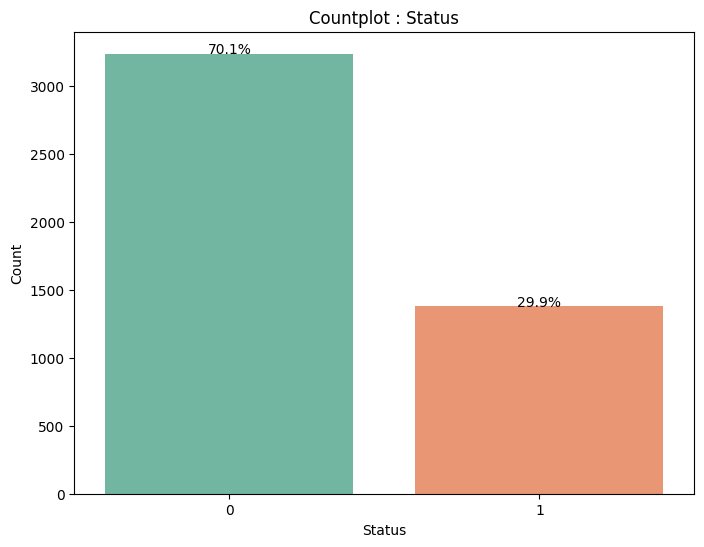

In [15]:
# Setting size of a plot
plt.figure(figsize = (8, 6))

# Setting title
plt.title('Countplot : Status')

# Setting x-axis label
plt.xlabel('Status')

# Setting y-axis label
plt.ylabel(f'Count')

# Plotting the countplot
plot = sns.countplot(data = data1, x = data1['status'], legend = False, palette = 'Set2')

# Adding percentage on top of each bar within countplot
for p in plot.patches:
  height = p.get_height()
  width = p.get_width()
  l = len(data1['status'])
  percentage = f'{100 * height / l:.1f}%'
  x = p.get_x() + width / 2
  y = height
  plot.annotate(percentage, (x, y), ha = 'center')

plt.show()

In [16]:
data1['status'].value_counts(normalize = True)

,proportion
status,
0,0.701431
1,0.298569


**Observations:**

*   **70.1%** of leads did not convert to a paid customer, while only **29.9%** of leads did convert. This indicates **moderate data imbalance**
*   SInce only **29.9%** of leads converted to a paid customer, this indicates a conversion bottleneck

### **Numerical Variables**

For numerical variables we will use

*   sns.histplot()
*   sns.boxplot()

In [17]:
# histplot_custom is user-defined function used for visualization with sns.histplot()
def histplot_custom(data, column, color, kde, title_label, x_label, y_label):
  # Setting size of a plot
  plt.figure(figsize = (20, 7))

  # Setting title
  plt.title(f'Histplot : {title_label}')

  # Setting x-axis label
  plt.xlabel(f'{x_label}')

  # Setting y-axis label
  plt.ylabel(f'{y_label}')

  # Plotting the histplot
  sns.histplot(data = data, x = column, color = color, kde = kde)

  plt.show()

In [18]:
# boxplot_custom is user-defined function used for visualization with sns.boxplot()
def boxplot_custom(data, column, title_label, x_label):
  # Setting size of a plot
  plt.figure(figsize = (20, 7))

  # Setting title
  plt.title(f'Boxplot : {title_label}')

  # Setting x-axis label
  plt.xlabel(f'{x_label}')

  # Plotting the boxplot
  sns.boxplot(data = data, x = column)

  plt.show()

#### **Age**

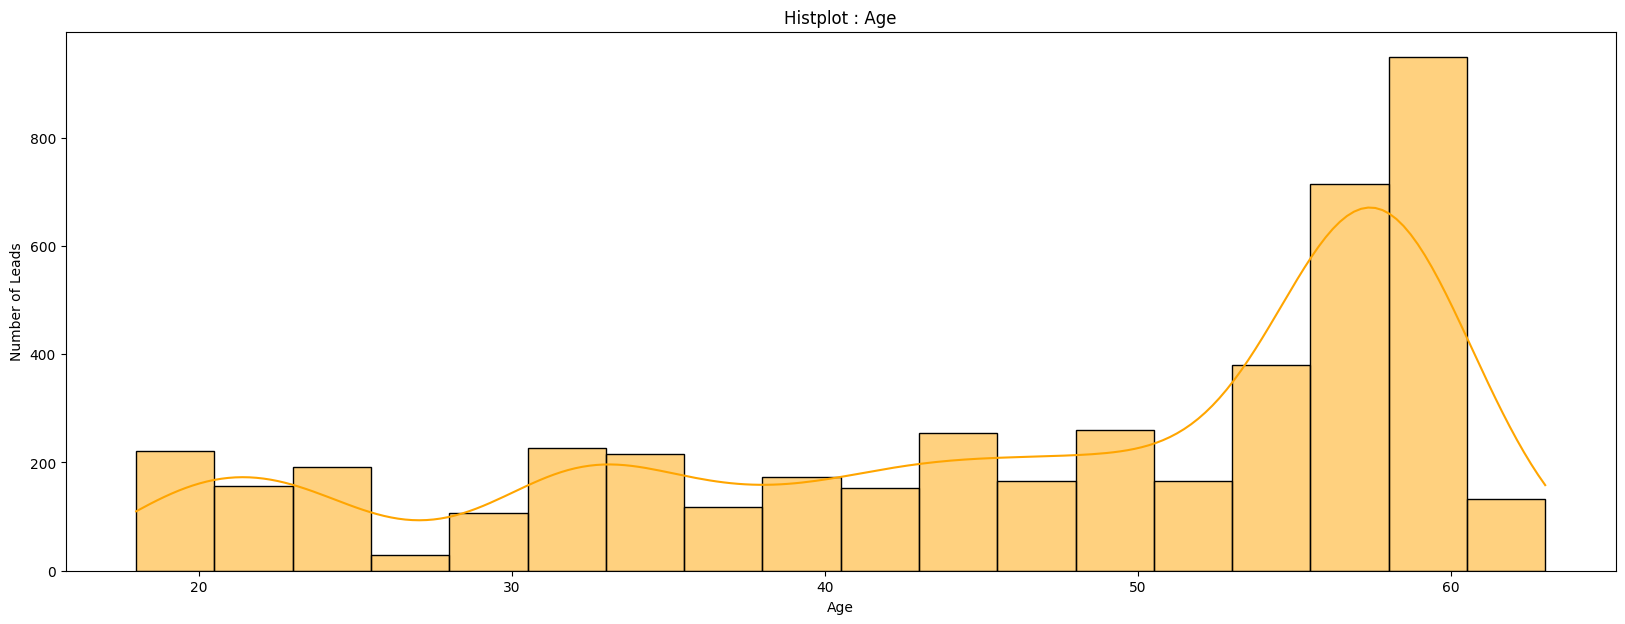

In [19]:
histplot_custom(data1, 'age', 'orange', True, 'Age', 'Age', 'Number of Leads')

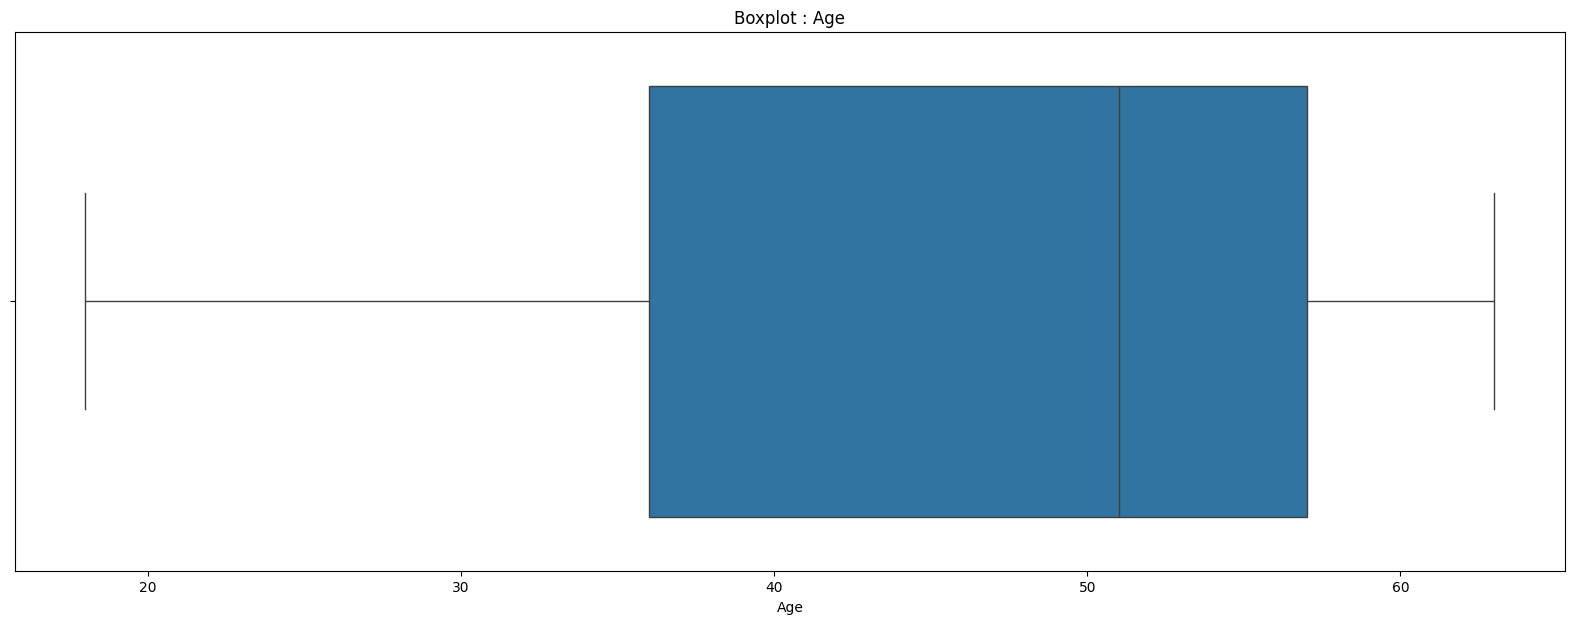

In [20]:
boxplot_custom(data1, 'age', 'Age', 'Age')

**Observations:**

*   Distribution is **left-skewed (negative skew)**
*   **KDE curve** has a peak at **58-60 age range**; this is where the highest density of leads is
*   Most leads are between the age of **50 and 60**, which indicates that platform is mainly visited/used by professionals who are close to retirement
*   Very few leads are below **30**, which indicates low engagement under the age of **30**
*   There are no extreme outliers, like e.g. 80+
*   Minimum age in the dataset is **18** and maximum age in the dataset is **63**, which indicates that data has already been cleaned or restrictied to students and working professionals
*   IRQ spans from **36 (Q1)** to **57 (Q3)**, which indicated that **50%** of leads are between **36** and **57** years old

#### **Website Visits**

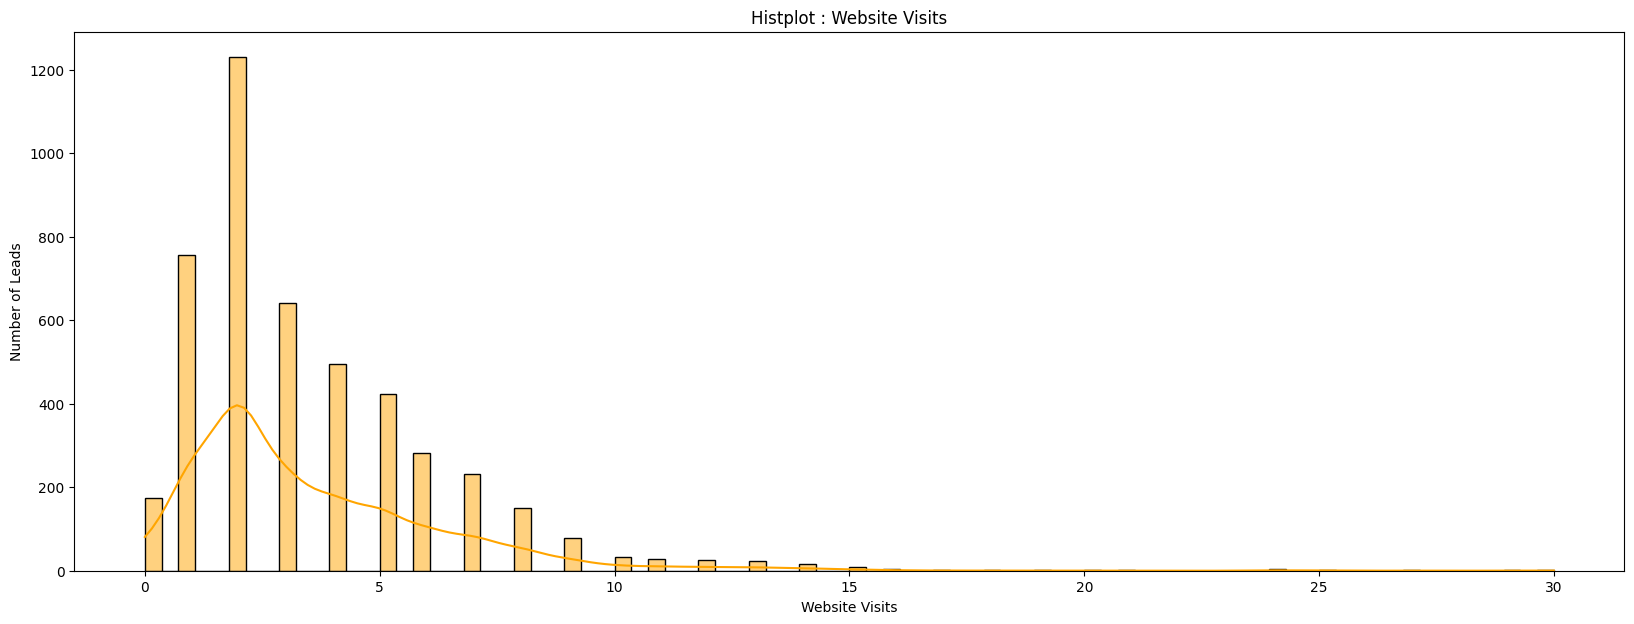

In [21]:
histplot_custom(data1, 'website_visits', 'orange', True, 'Website Visits', 'Website Visits', 'Number of Leads')

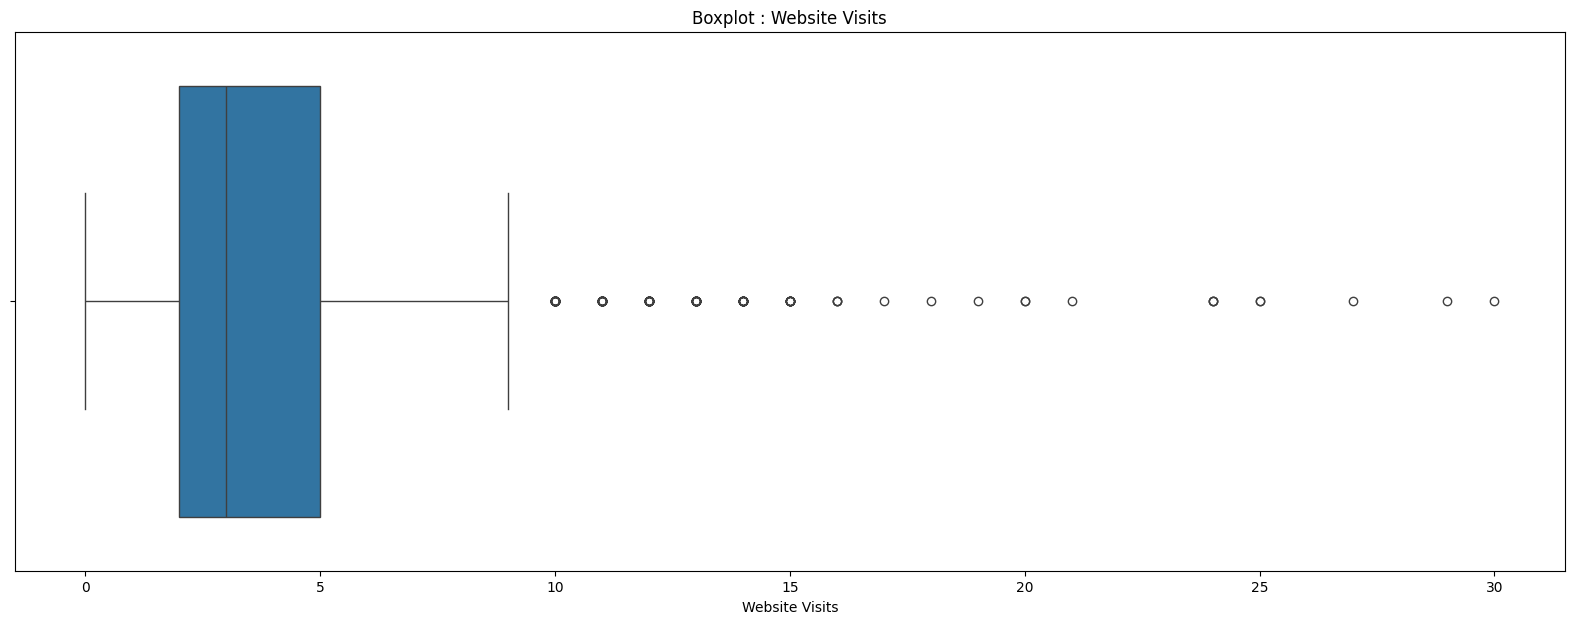

In [22]:
boxplot_custom(data1, 'website_visits', 'Website Visits', 'Website Visits')

**Observations:**

*   Distribution is **right-skewed (positive skew)**
*   Most users visit the website **fewer than 5 times**
*   The highest frequency is at **2 visits**, followed by **1 and 3**, which indicates quick decision making or early drop-out
*   There is sharp decline after **5 visits**, which indicates that repeated visits are uncommon, but that there is a small set of highly active leads
*   **KDE curve** confirms that website visits are concentrated on the lower end
*   Median is **3**, which indicates that half of the leads visit the website 3 times or less
*   The outliers are present in data after the value of **8**
*   Some leads have visited the website 20-30+ times, which indicates a clear behavioral signal of high intent

#### **Time Spent on Website**

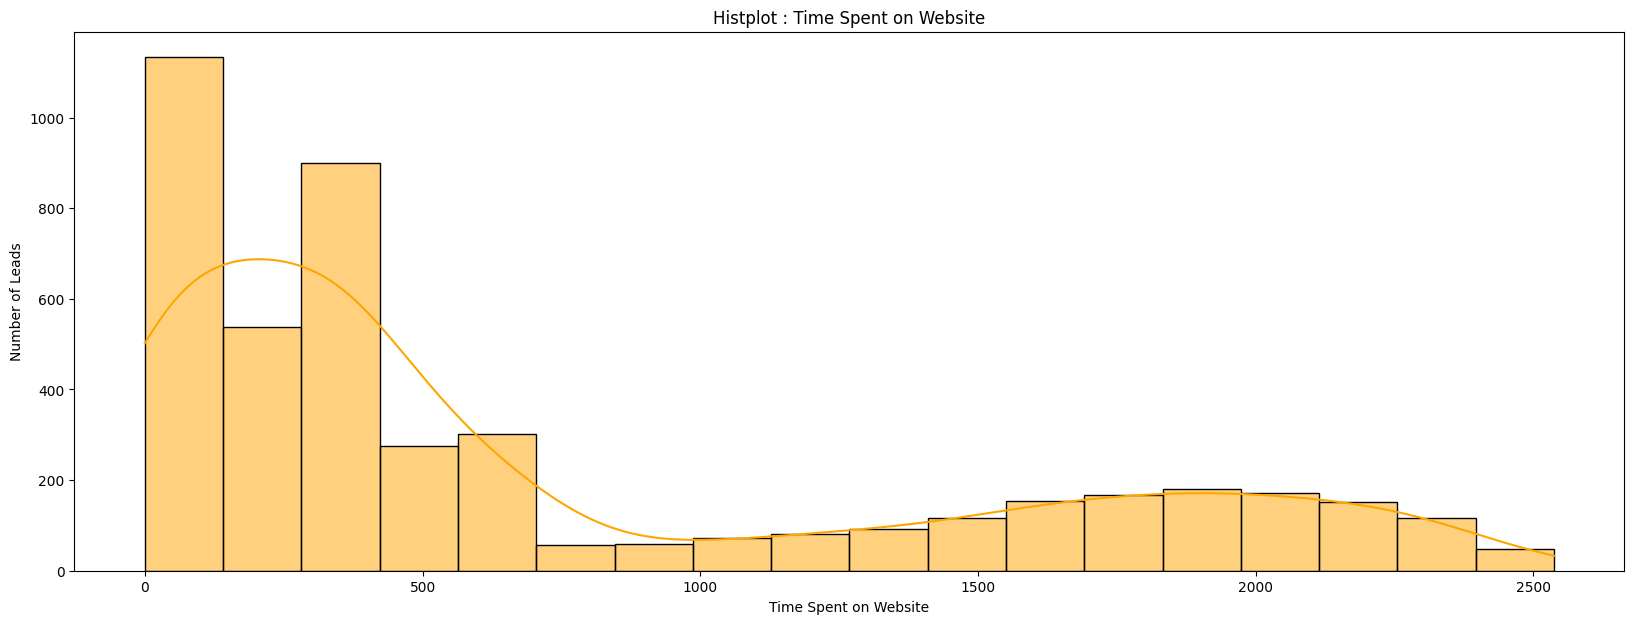

In [23]:
histplot_custom(data1, 'time_spent_on_website', 'orange', True, 'Time Spent on Website', 'Time Spent on Website', 'Number of Leads')

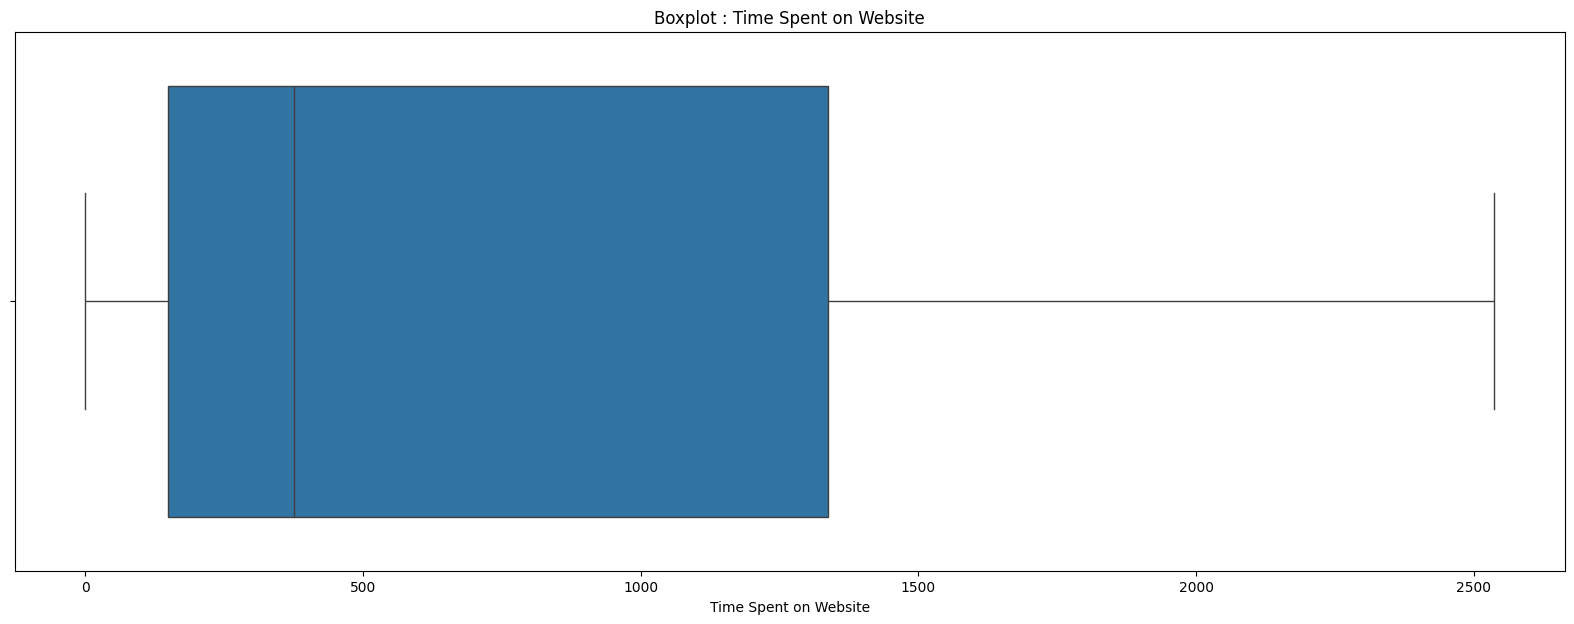

In [24]:
boxplot_custom(data1, 'time_spent_on_website', 'Time Spent on Website', 'Time Spent on Website')

**Observations:**

*   Distribution is **right-skewed (positive skew)**
*   Most leads spend less than **500 sec** on the website
*   There is a peak between **0 and 200 sec**, which indicates that majority of leads are brief visitors
*   Some leads spend more that **1000 sec** on the website, which indicates small group of leads with high interest
*   **KDE curve** confirms strong concentration at low times with a quick drop-off
*   The median is located closer ot **lower quartile (Q1)** than the **upper quartile (Q3)**
*   The whiskers range from **0** to over **2500**, which indicates **wide usage range**
*   The values **>2000** are rare, but since they are within whiskers they are not classified as outliers

#### **Page Views per Visit**

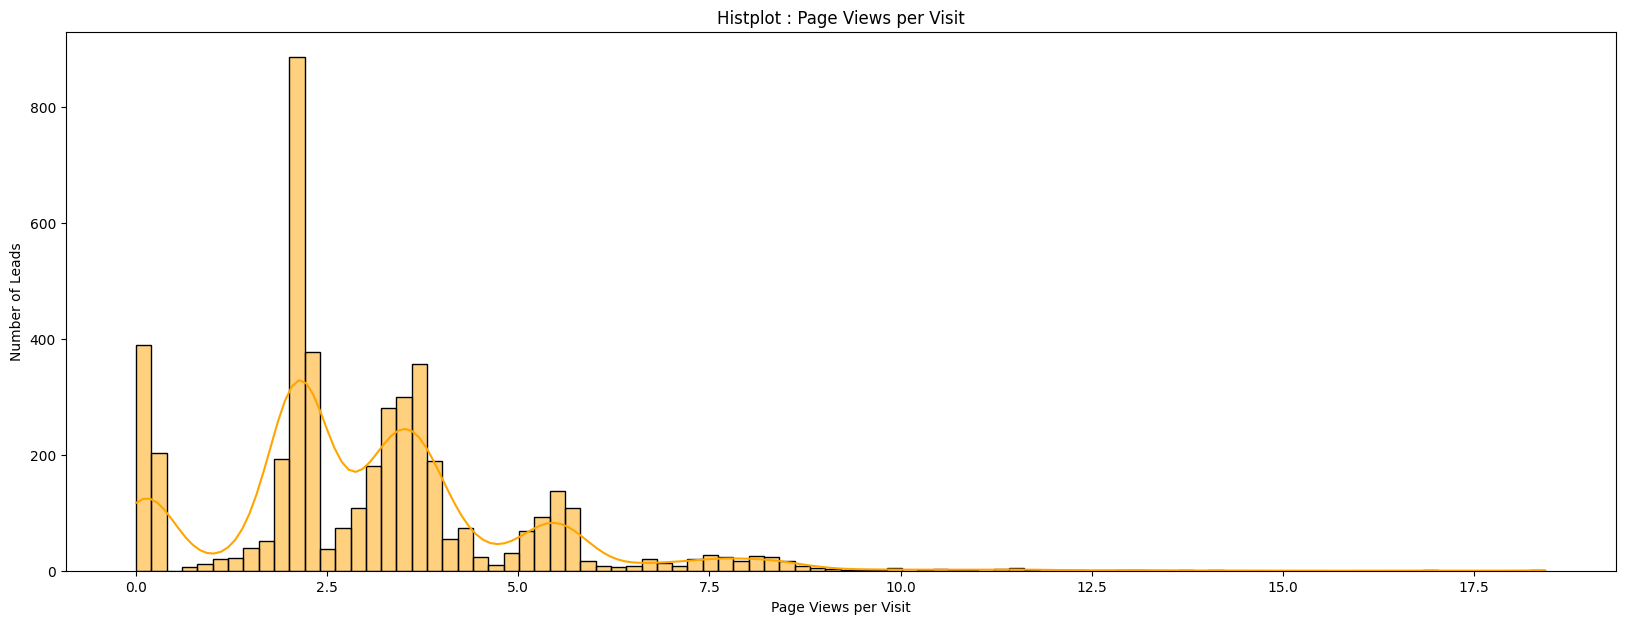

In [25]:
histplot_custom(data1, 'page_views_per_visit', 'orange', True, 'Page Views per Visit', 'Page Views per Visit', 'Number of Leads')

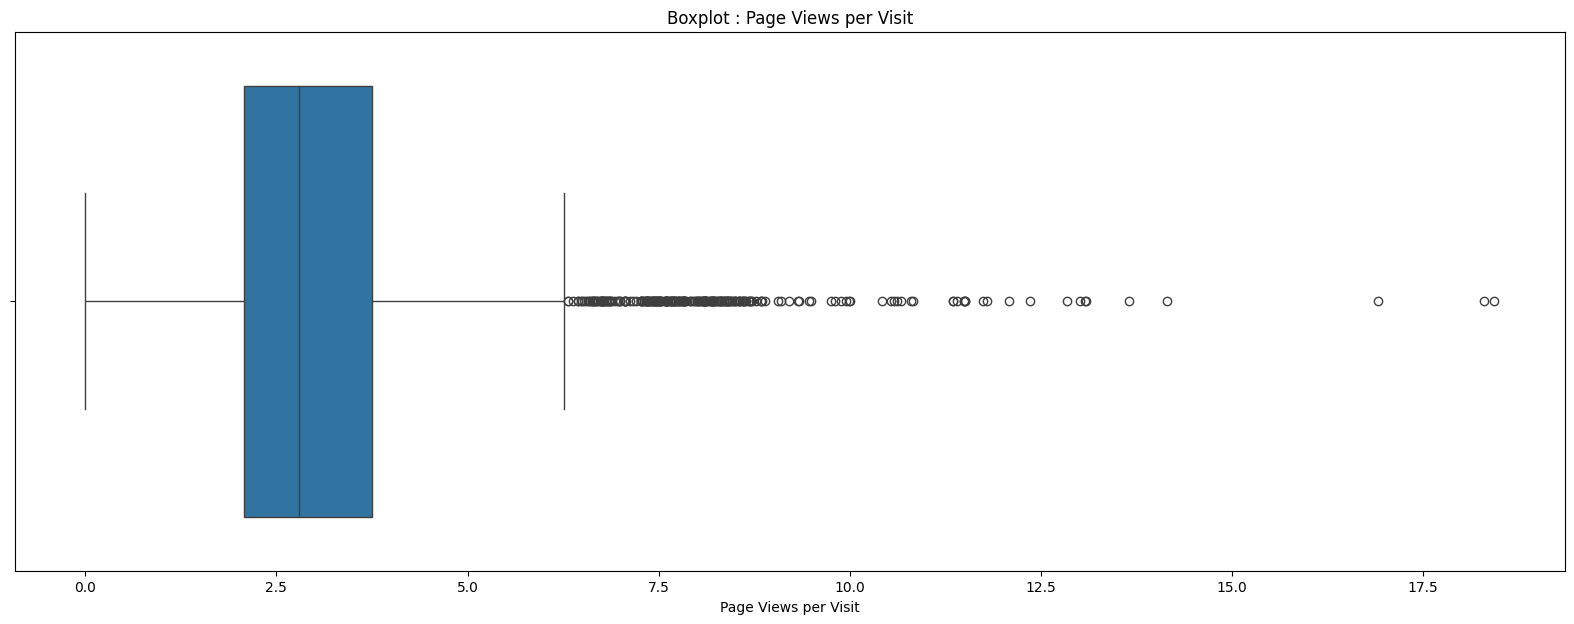

In [26]:
boxplot_custom(data1, 'page_views_per_visit', 'Page Views per Visit', 'Page Views per Visit')

**Observations:**

*   There are strong peeks around **2.5 and also around 0, 4 and 6**, which indicates distinct groups of leads behavior
*   Some users view only 1-2 pages, while others view more e.g. **4 or 6**
*   Majority of leads cluster between **1 and 4** page view per visit, especially around **2-3 pages**, which indicates that brief browsing sessions are common
*   **KDE curve** confirms the multi-modal structure, likely reflecting different engagement levels e.g. serious vs casual exploration
*   The box is narrow, which indicates limited variability among the majority
*   There is large number of outliers, which could possibly reflect very engaged leads
*   Median is closer to the lower bound, and long whiskers/outliers on the right indicates that distribution is **right-skewed (positive skew)**

### **Categorical Variables**

For categorical variables we will use

*   sns.countplot()

In [27]:
# countplot_custom is user-defined function used for visualization with sns.countplot()
def countplot_custom(data, cat_cols, n_cols = 3, rotate = 'N'):
  # Defining grid dimension
  n = len(cat_cols)
  rows = math.ceil(n/n_cols)

  # Creating the subplots' grid
  fig, axes = plt.subplots(rows, n_cols, figsize = (5 * n_cols, 5 * rows))
  axes = axes.flatten()

  # Creating countplot for each categorical variable
  for i, col in enumerate(cat_cols):
    ax = axes[i]
    order = data[col].value_counts().index
    l = len(data[col])
    plot = sns.countplot(data = data, x = col, ax = ax, order = order, palette = 'Set2')

    # Adding percentage on top of each bar within countplot
    for p in plot.patches:
      height = p.get_height()
      width = p.get_width()
      percentage = f'{100 * height / l:.1f}%'
      x = p.get_x() + width / 2
      y = height
      plot.annotate(percentage, (x, y), ha = 'center')

    # Setting title
    ax.set_title(f'Countplot : {col}')

    # Setting x-label
    ax.set_xlabel(f'{col}')

    # Setting y-label
    ax.set_ylabel('Count')

    # Rotating x-axis tick labels
    if rotate == 'Y':
      ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

  plt.show()

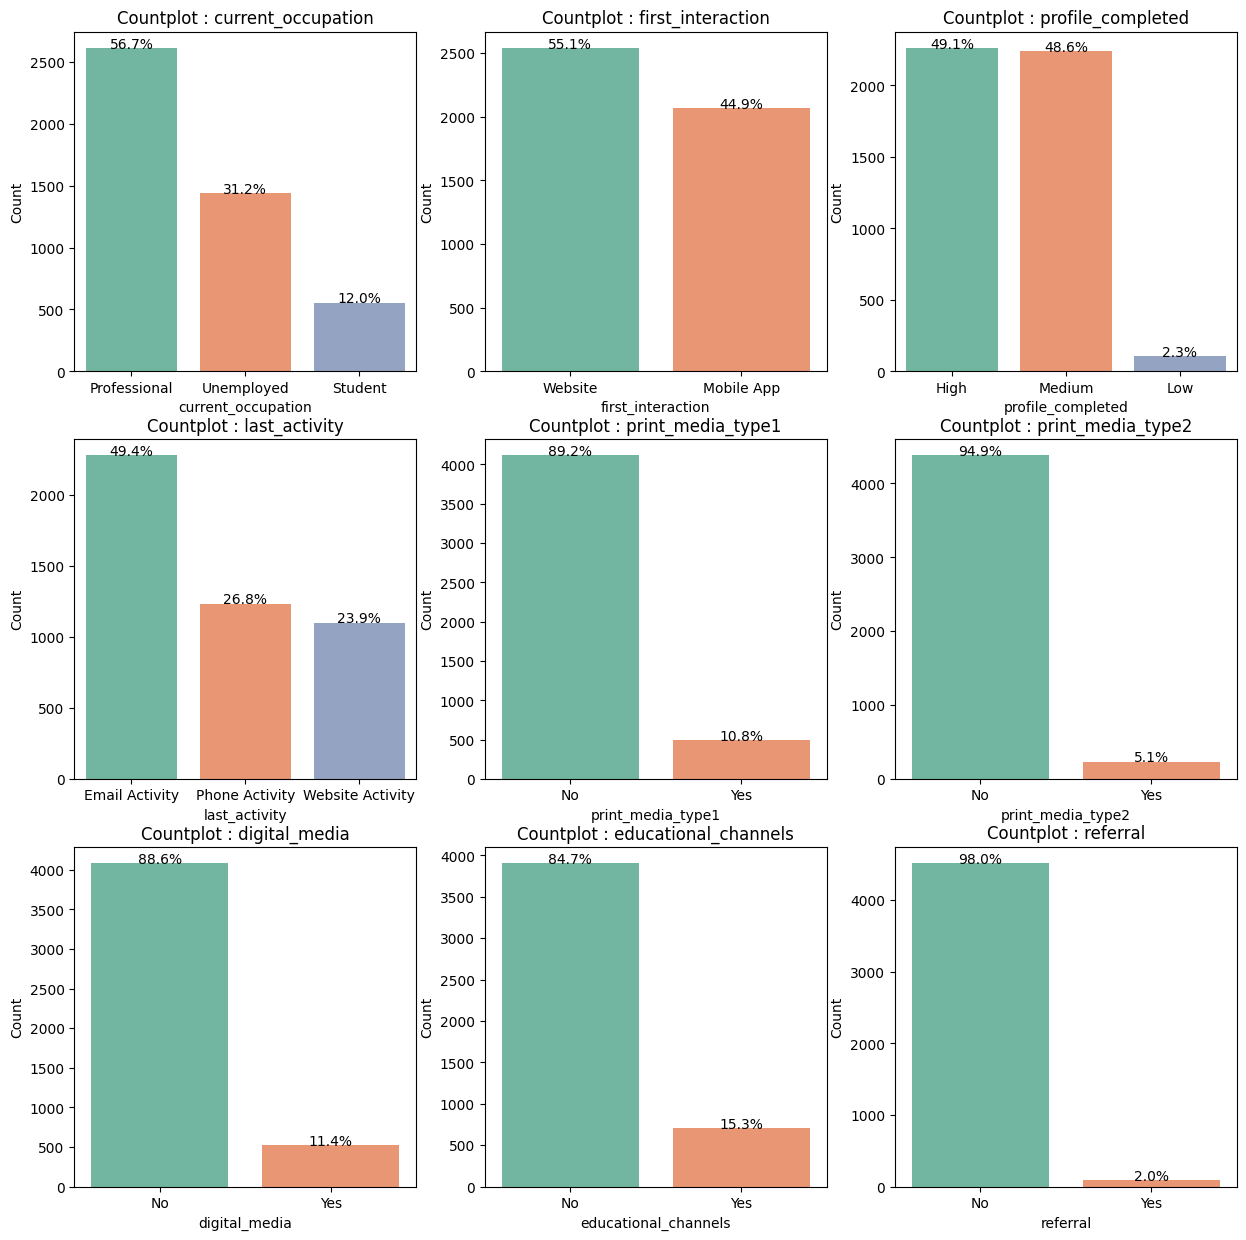

In [ ]:
countplot_custom(data1, cat_vars, 3, 'N')

In [28]:
# Checking class imbalance and understanding dominat categories
# data[i].value_counts(normalize = True) counts frequency of each category in a column and converts raw counts to relative frequences (propotions)
for i in cat_vars:
  print(f'Distribution of {i}')
  print('-' * 40)
  print(data1[i].value_counts(normalize = True))
  print('*' * 40)
  print ('\n')

Distribution of current_occupation
----------------------------------------
current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
****************************************


Distribution of first_interaction
----------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
****************************************


Distribution of profile_completed
----------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
****************************************


Distribution of last_activity
----------------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
****************************************


Distribution of print_media_type1
-------------------------------

**Observations:**

*   Majority of leads are working professionals **56.7%**, while students make-up a very small amount with **12%**
*   There is fairly balanced split between website and mobile App leads
*   Almost all users completed their profile to a medium or high level, which indicates a commited audience. Only **2.3%** of leads have low level of profile completion
*   Email activity is the most common last touchpoint with **49.4%**, followed by phone activity with **26.8%**. Website-only interactions are least common, which indicates that users usually switch to another channel before converting
*   Most leads are not influenced by **print media type 1 (89.2%)**, which indicates that very small percentage of leads (**10.8%**) have learned about ExtraaLearn from newspaper
*   There is even less influence by **print media type 2**, which indicates that very small percentage of leads **(5.1%)** learned about ExtraaLearn from magazine
*   **88.6%** of leads is not exposed to digital media campaigns, despite the increasing trend of digital media
*   Only small amount of leads come through educational channels (**15.3%**)
*   Extremely low referral traffic (**2%**), which might indicate that there is no referral program in place or referrals are not being tracked effectively

## **Exploratory Data Analysis (EDA) - Bivariate/Multivariate Analysis**

### **Correlation between Numerical Variables**

For correlation between numerical variables we will use

*   sns.heatmap()

**Note:** Variable **status** is binary categorical variable and as such it is not be added to a heatmap, even it is of type **int64**

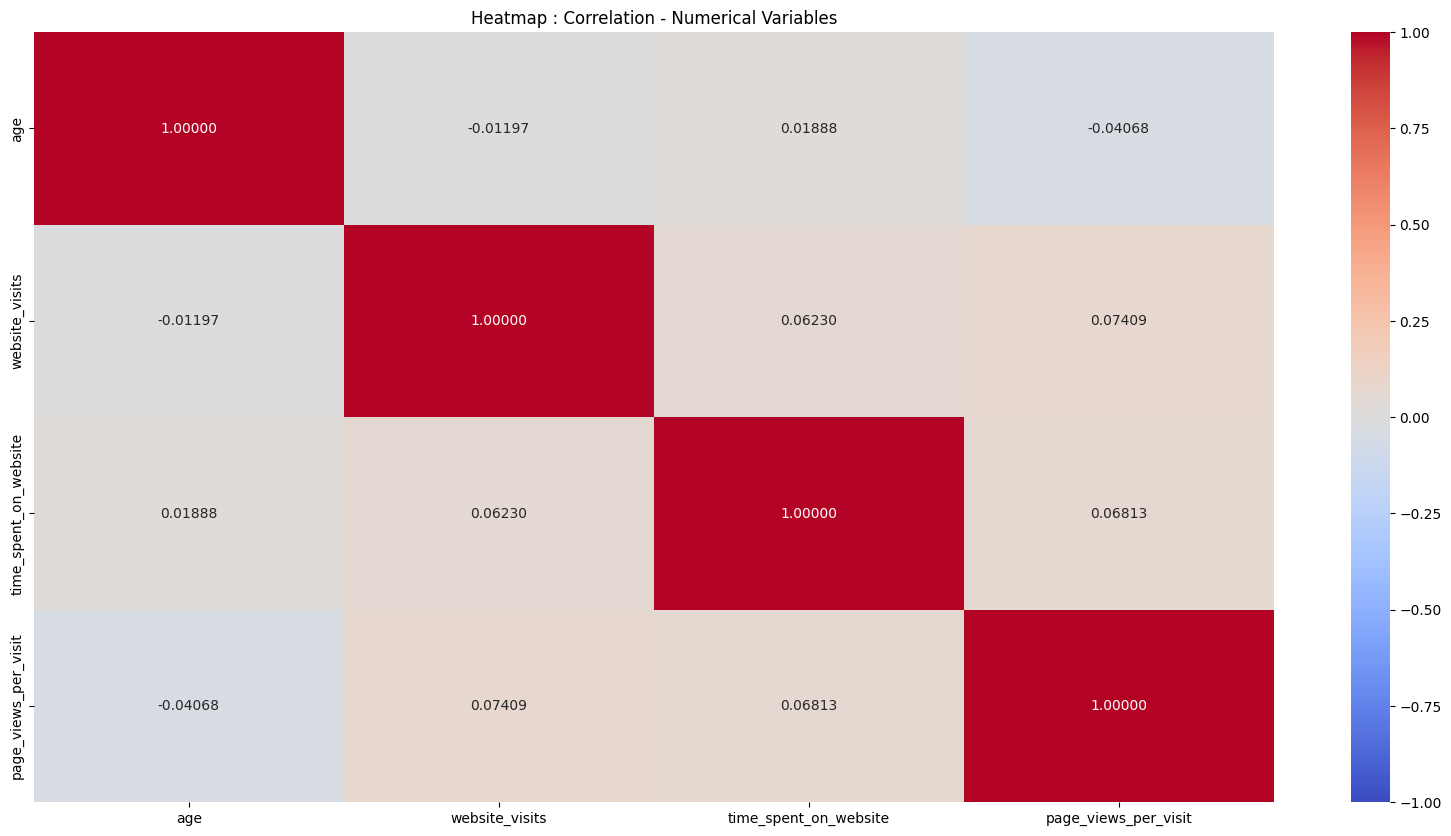

In [29]:
# Setting correlation
corr = data1[num_vars].corr()

# Setting size of a plot
plt.figure(figsize = (20, 10))

# Setting title
plt.title(f'Heatmap : Correlation - Numerical Variables')

# Plotting the heatmap
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, fmt = ".5f", xticklabels = corr.columns, yticklabels = corr.columns)

plt.show()

**Observations:**

*   Heatmap shows that there is **no strong correlation** between numerical variables
*   Correlation coefficients between the variables are close to 0, which indicates weak linear corellation
*   1 on diagonal indicates that each variable is perfectly correlated to itself, which is to be expected in correlation matrix

### **Relationship between Variable Status and Numerical Variables**

In [30]:
# Grouping mean of numerical variables by status
data1.groupby(['status'])[num_vars].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


**Observations:**

*   Average age of converted leads is **3.5 years higher**, which may indicate interest, trust and/or alignment with the offering
*   Common assumption that visiting the website often increases conversion of leads to a paid customer does not apply here
*   Converted leads spent **85%** more time on the website vs those who didn't convert, which indicates that engagement is more important than frequency
*   Converted and non-converted leads view almost the same number of pages per visit

### **Relationship between Variable Status and Categorical Variables**

In [31]:
# stackedbar_custom is user-defined function used for visualization with pandas plot() method
def stackedbar_custom(data, cat_columns, target_column):
  for i in cat_columns:
    # Creating normalized crosstab and converting it to percentage
    data_crosstab = pd.crosstab(data[i], data[target_column], normalize = 'index').mul(100)

    # Setting size of a plot
    fig, ax = plt.subplots(figsize=(8, 4))

    # Setting title
    ax.set_title(f'Stacked Bar : {i}')

    # Setting legend
    ax.legend(title = target_column)

    # Setting y-axis
    ax.set_ylabel('Percentage')

    # Plotting stacked bar
    data_crosstab.plot(kind = 'bar', stacked = 'True', ax = ax, color = sns.color_palette('Set2'))

    plt.show()

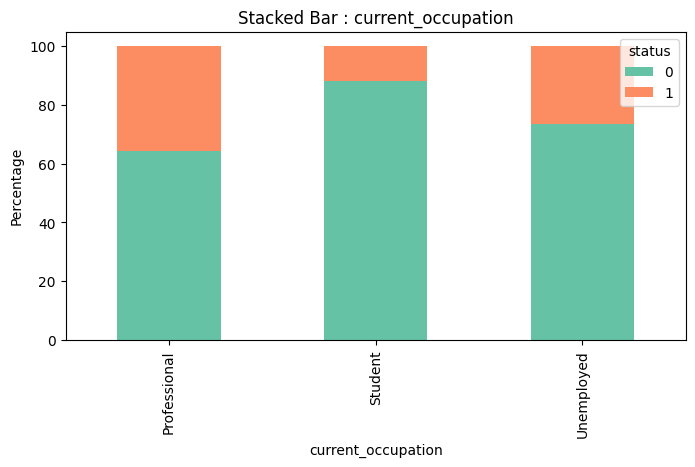

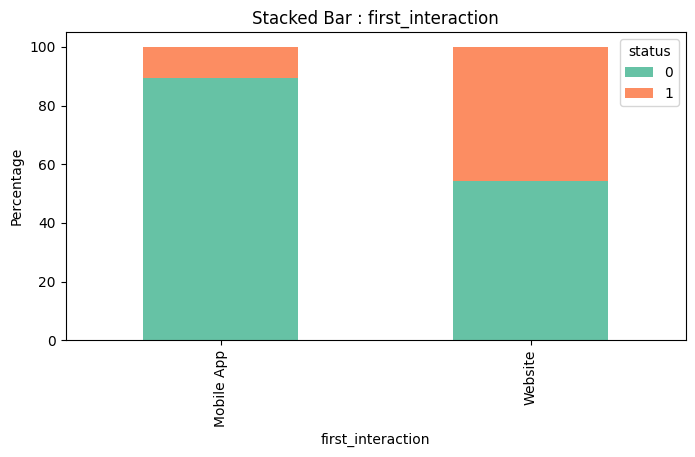

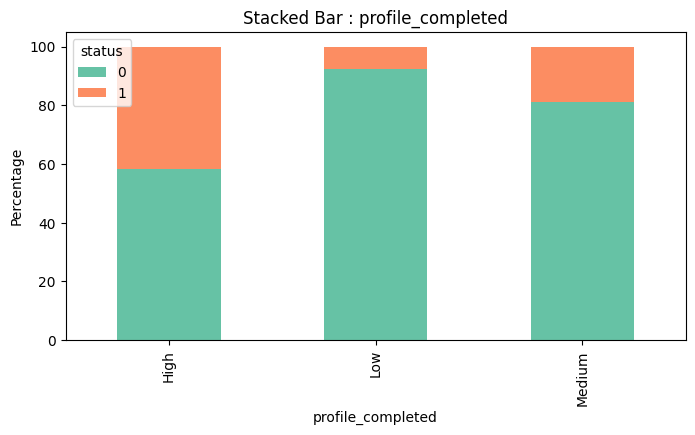

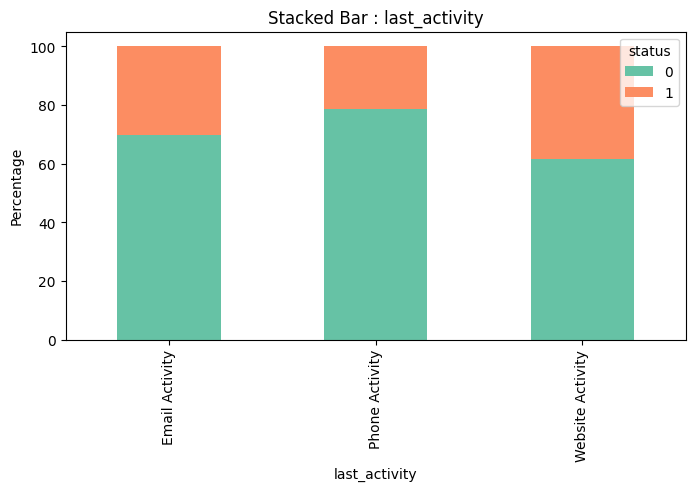

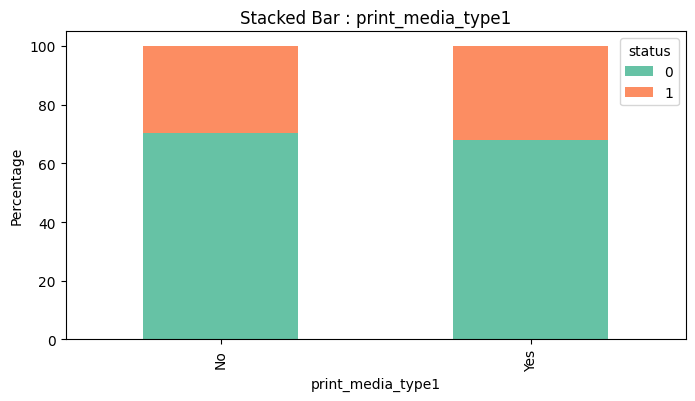

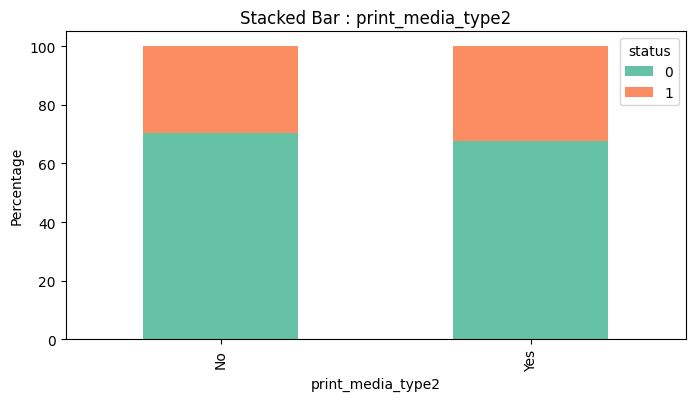

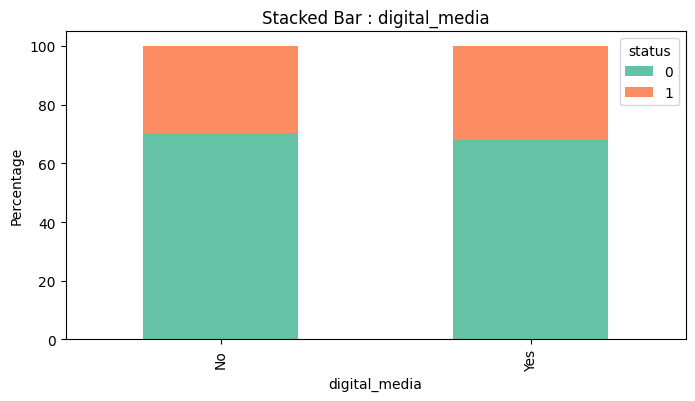

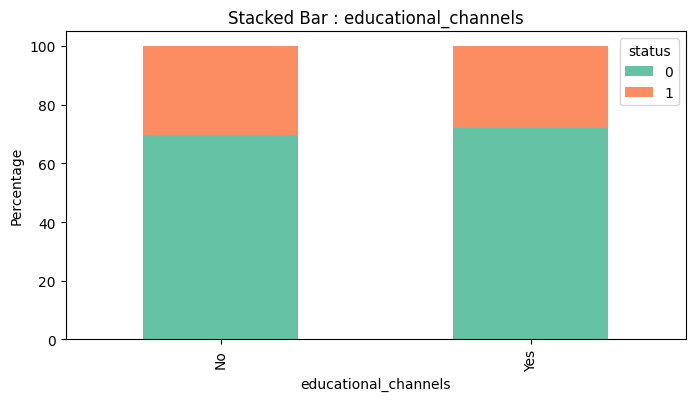

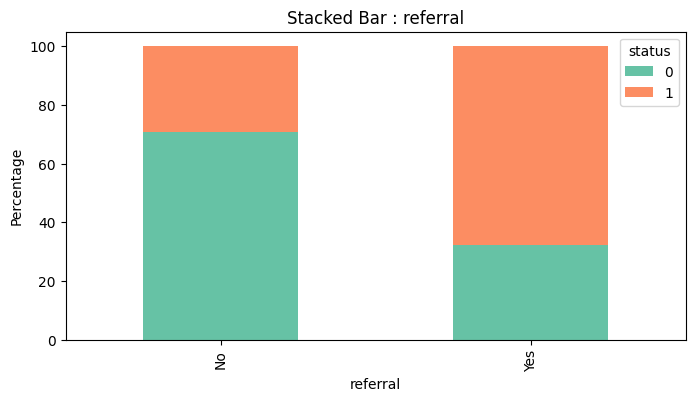

In [32]:
stackedbar_custom(data = data1, cat_columns = cat_vars, target_column = 'status')

**Observations:**

*   Working professionals have the highest conversion rate, with more that 1/3 of working professional converted
*   Students have the lowest conversion rate. Most students did not convert, which might indicate mismatch with the offering
*   Website has much higher conversion rate, with nearly half of the leads being converted
*   Mobile App has very low conversion rate (**15%**)
*   Leads with high level of profile completion are more likely to convert than medium or low
*   Leads with last activity being on the website are more likely to convert, email activitely is also effectibe, but slightly lower than website, while phone activity has lower conversion influence
*   There is minor positive effect of print media type 1 on conversion. Similar applies to print media type 2
*   Digital media exposure has a mild positive influence on conversion
*   Educational channel show a weak positive correlation with conversion
*   Referral is strong positive indicator of conversion. Users who came through referrals have much higher likelihood of converting

## **Summary of EDA**

### **Data Description**

*   All columns have **4612 non-null values** and since number of rows is equal to 4612, we can conclude that **there are no missing values in the data**
*   There are **4** variables of dtype **int64**, **1** variable of dtype **float64** and **10** variables of dtype **object**
*   Dataset does not contain NULL values
*   There are no duplicates in the data
*   Variable **ID** has unique value for each lead and as such does not bring any value to our model, so we can drop it
*   Variables vary in scale, which indicates that normalization or standardization is needed
*   Most of the categorical variables will require encoding (e.g. One-Hot or Label Encoding)
*   Variable **status** is target variable, representing lead conversion to a paid customer 1 = YES, 0 = NO

### **Data Cleaning**

*   Variable ID has unique value for each lead and as such does not bring any value to our model, so we can drop it
*   Features **print_media_type1** and **print_media_type2** have minimal impact on lead conversion, but can be kept in a model, **print_media_type1** for cost effectivness and **print_media_type2** for segmentation
*   Features **print_media_type1** and **print_media_type2** have low importance individually, but may be usefull in combination with others e.g. in tree-based models
*   Referrals have extremely low referral traffic **(2%)**. Despite being a small group, their quality is extremely high
*   **Referral** is likely to be important in classification model
*   Feature **profile_completed** may be useful for predicting conversion to a paid customer, as high completion may indicate higher interest
*   Correlation coefficients between numerical variables are close to 0, which indicates weak linear corellation
*  Focus should be on engagement quality and not on session duration

### **EDA Observations**

*   Online education platform of ExtraaLearn primarily attracts older individuals **(45-65 years)**
*   Younger audience is underrepresented
*   Students make-up a very small amount of all leads (**12%**), which might be an indicator of misalignment with ExtraaLearn offering
*   Optmization of user experience is needed accross both platforms, website and mobile App
*   Professional users dominate and are most engaged
*   Leads come equaly from the website and mobile App
*   The feature **profile_completed** is very well distributed
*   Print media exposure is very low, and may not add value to lead qualification models
*  Educational channels are niche audience that could be scaled-up with more targeted offering
*  Most leads do not come from digital campaigns
*  Consideration for launching referral incentive programs
*  Exploring tailored marketing strategies to more effectively convert younger leads into paid customers would be a recommendation
*  Introducing AI Chat or/and **FAQ widgets** would be a recommendation
*  Improving landing page of the website would be a recommendation
*  Improving internal linking between pages to encourage deeper exploration would be a recommendation
*  Offering exit-intent pop-ups to keep visitors engaged would be a recommendation
*  Website is more effective at driving conversion than mobile App
*  Mobile App users might be more casual or distracted
*  Leads with high profile completion show clear intent and as such should pe prioritized in lead scoping
*  Leads with low profile completion might be low-intent visitors
*  Evaluation of script/effectivness of phone engagement
*  Flagging referred leads as high-value leads for prioritized follow-up

## **Model Building - Approach**

1. Preparing the data for modeling
2. Partitioning the data into train and test data subsets
3. Building the model on the train data
4. Tuning the model
5. Testing the model on the test data

### **Facts**

*   This is supervised binary classification problem with target feature **status: 0 or 1**
*   The dataset has moderate size (**4612** rows) and includes both **numerical** and **categorical features**
*   There is no strong **multicollinearity** within numerical features
*   Several numerical features in the dataset are skewed and contain outliers
*   There is mild to moderate imbalance of data in **status** feature (**70:30**), which can affect model performance for models that are sensitive to class imbalance like e.g. **Logistic Regression**. **Decision Tree** and **Random Forest** are less sensitive to class imbalance.

### **Model Recommendation**

1.   **Random Forest** handles both numerical and categorical features well, it is robust for outliers and skewed distributions, handles nonlinear relationships, provides feature importance insights
2.   **Decision Tree** is easy to visualize and explain, good for spotting logic/rules, but it is prone to overfitting
3.   **Gradient Boosting** handles nonlinearity, missing values and interactions, has very high performance on structured/tabular data, but is more complex and slower to train, as well harder to tune
4.   **Logistic Regretion** is easily explained to stakeholders, fast and efficient, but assumes linear relationships and is sensitive to outliers and multicollinearity

### **Preparing Data for Modeling**

*   Encoding categorical features (One-Hot/Label/Ordinal Encoding)
*   Separating dependent variable **status** from independent variables

#### **Encoding Categorical Features**

In [33]:
# Label Encoding for Binary Categorical Features: print_media_type1, print_media_type2, digital_media, educational_channels, referral
# Creating list of binary categorical features
binary_cols = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Applying label encoding: 'Yes' -> 1, 'No' -> 0
for i in binary_cols:
  data1[i] = data1[i].map({'Yes': 1, 'No': 0})

# One-Hot Encoding for Nominal Categorical Features: current_occupation, first_interaction, last_activity
# Creating list of nominal categorical features
nominal_cols = ['current_occupation', 'first_interaction', 'last_activity']

# Applying one-hot encoding
# drop_first = True prevents multicollinearity by dropping 1 dummy column per feature; prevents dummy variable trap
data1 = pd.get_dummies(data = data1, columns = nominal_cols, drop_first = True, dtype = int)

# Ordinal Encoding for profile_completed feature
# Defining mapping dictionary
profile_map = {'Low': 0, 'Medium': 1, 'High': 2}

#Applying ordinal encoding
data1['profile_completed'] = data1['profile_completed'].map(profile_map)

In [34]:
# Viewing first 5 rows of the dataset
data1.head()

,age,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,last_activity_Phone Activity,last_activity_Website Activity
0,57,2,7,1639,1.861,1,0,1,0,0,1,0,1,1,0,1
1,56,1,2,83,0.320,0,0,0,1,0,0,0,0,0,0,1
2,52,1,3,330,0.074,0,0,1,0,0,0,0,0,1,0,1
3,53,2,4,464,2.057,0,0,0,0,0,1,0,1,1,0,1
4,23,2,4,600,16.914,0,0,0,0,0,0,1,0,1,0,0


#### **Separating Y from X**

In [35]:
# Separating dependent variable 'status' from independent variables
X = data1.drop('status', axis = 1)
Y = data1['status']

#### **Scaling the Data**

**Normalization** of data is not required due to following reasons:

*   **Decision Tree** splits data based on feature treshhold and not based on distance, and this is why scaling does not affect order of the data
*   **Random Forest** consists of **Decision Trees** and as such inherits same behaviour



### **Splitting the data into train and test data subsets**

*   We will split the data in **70%** train and **30%** test data subsets

In [36]:
# Splitting the data
# random_state = 1 ensures reproducibility of data split
# stratify = Y maintains target class distribution
# x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

## **Building Classification Models**

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting a lead will convert when the lead doesn't convert (**False Positive**)
2. Predicting a lead will not convert when the lead actually converts (**False Negative**)

**Which case is more important?**

* **Predicting that a lead will not convert when the lead actually converts**. This would be considered as a major miss for any lead conversion predictor and is hence more important case of wrong predictions. In case of **False Negative** we ignore a lead who could have converted, which can lead to lost opportunity and revenue.

**How to reduce this loss e.g. the need to reduce False Negatives?**
* **The company would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives very well, so that the company can invest resources and time for marketing campaigns and sales call for leads that are about to convert to a paid customer.

In [37]:
# metric_score is user-defined function used to evaluate classification model performance
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    # Computing confusion matrix
    cm = confusion_matrix(actual, predicted)

    # Setting size of a plot
    plt.figure(figsize = (8, 5))

    # Plotting the confusion matrix using sns.heatmap()
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Convert', 'Convert'], yticklabels = ['Not Convert', 'Convert'])

    # Setting label for axes
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.show()

In [38]:
# model_performance_classification is user-definied function used to compute different metrics to check classification model performance
# model = classifier; predictors = independent variables; target = dependent variables
def model_performance_classification(model, predictors, target):
    # Predicting using the independent variables
    pred = model.predict(predictors)

    # Computing recall
    recall = recall_score(target, pred, average = 'macro')

    # Computing precision
    precision = precision_score(target, pred, average = 'macro')

    # Computing accuracy
    acc = accuracy_score(target, pred)

    # Creating a DataFrame df to store evaluation metrics
    df_perf = pd.DataFrame(
        {
            "Precision": precision,
            "Recall": recall,
            "Accuracy": acc,
        },
        index = [0],
    )

    return df_perf

## **Decision Tree Classifier**

### **Building the Decision Tree Classifier**

*   We will build our model using the **DecisionTreeClassifier function**
*   **max_depth** and **min_samples_leaf** are hyperparameters of the decision tree classifier that will be used for tuning the model

In [39]:
# Building decision tree classifier
# random_state = 1 is locking the randomness, so the tree structure is consistent every time code is executed; This will result in training data always producing same decision tree
dt = DecisionTreeClassifier(random_state = 1)

In [40]:
# Fitting decision tree classifier
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

### **Checking Model Performance**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



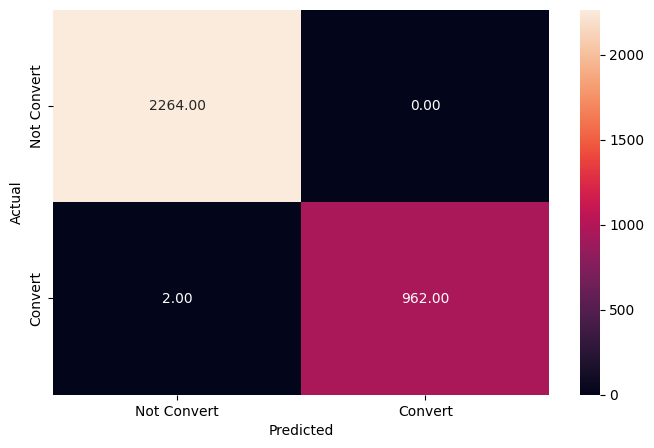

In [41]:
# Checking performance on the train data
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observations:**

*   There is **100% score** for all metrics on train dataset, which indicates that model performed very good on train data
*   **100% score** for all metrics on train data may be an indicator of **overfitting** and for this reason we need to check the performance of a model on test data

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       971
           1       0.64      0.63      0.64       413

    accuracy                           0.78      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.78      0.78      0.78      1384



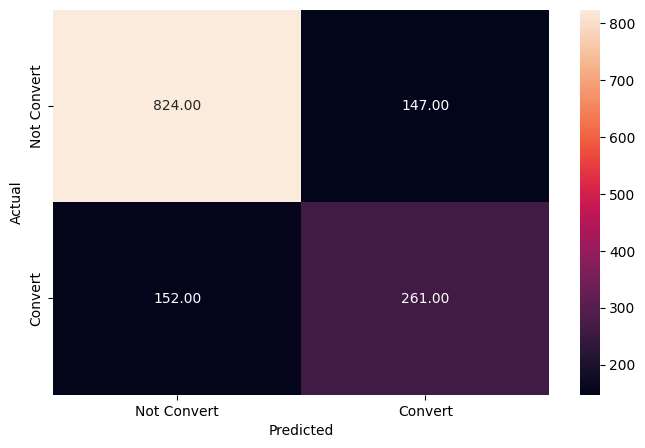

In [42]:
# Checking performance on the test data
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [43]:
dt_test = model_performance_classification(dt, x_test, y_test)
dt_test

,Precision,Recall,Accuracy
0,0.741984,0.740285,0.78396


**Observations:**

*   **Precision**:
    *   **Class 0**: **Precision** = **84%**
    *   **Class 1**: **Precision** = **64%**
*   **Recall**:
    *   **Class 0**: **Recall** = **85%**
    *   **Class 1**: **Recall** = **63%**
*   **F1-score**:
    *   **Class 0**: **Recall** = **85%**
    *   **Class 1**: **Recall** = **64%**
*   The Decission Tree Classifier works well on train data, but not so well on test data, meaning that model is overfitting the train data
*   The **precision** of test data indicates that there is **36%** chance that model will predict that lead is going to convert into a paid customer, where in reality it won't, meaning that company would waste their recources and time on leads who are not going to convert
*   Lower precision of **64%** for **Class 1** indicates that model is over-predicting conversions
*   As we aim to minimize **False Negatives**, we will be focusing on maximizing **Recall**

### **Model Tuning**

#### **Using GridSearch for Hyperparameter Tuning**

*   Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use GridSearch to perform hyperparameter tuning
*   **GridSearch is a tuning technique that attempts to compute the optimum values of hyperparameters**
*   **It is an exhaustive search** that is performed on the specific parameter values of a model
*   The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid

**Decision Tree Hyperparameters**

*   **Criterion**
    *   **gini** or **entropy**
    *   The function is to measure the quality of a split. Supported criteria are **gini** for the Gini impurity and **entropy** for the information gain
*   **max_depth**
    *   The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than **min_samples_split** samples
*   **min_samples_leaf**
    *   The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least **min_samples_leaf** training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression

#### **Model Tuning with GridSearch**

To tell the model that **1 is an important class** we will use **class_weight** hyperparameter with values **{0: 0.3, 1: 0.7}** which is the oppposite of the imbalance in original data

In [44]:
# Choosing the classifier type
# To tell the model that 1 is an important class, we will use class_weight hyperparameter with values {0: 0.3, 1: 0.7}, which is the oppposite of the imbalance in original data
dt_estimator = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

# Grid of parameters to choose from
dt_parameters = {'max_depth': np.arange(2, 7),
                 'criterion': ['gini', 'entropy'],
                 'min_samples_leaf': [5, 10, 20, 25]
                }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the GridSearch
gridCV = GridSearchCV(dt_estimator, dt_parameters, scoring = scorer, cv = 10)

# Fitting the GridSearch on the train data
gridCV = gridCV.fit(x_train, y_train)

# Setting the classifier to the best combination of parameters
dt_estimator = gridCV.best_estimator_

# Fitting the best estimator to the train data
dt_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=np.int64(3), min_samples_leaf=5,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      2264
           1       0.61      0.90      0.73       964

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.80      0.81      3228



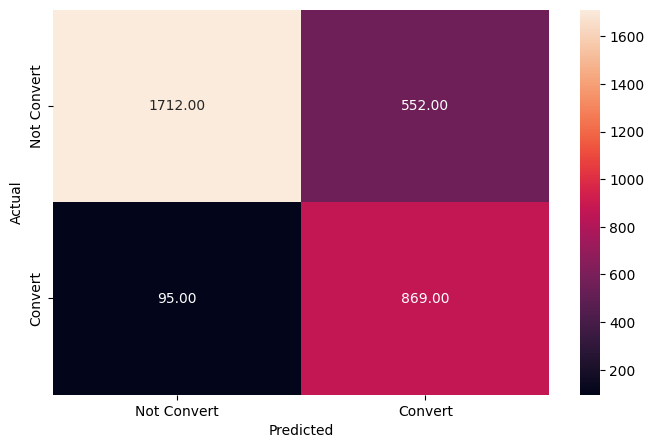

In [45]:
# Checking performance on the train data
y_train_pred_dt = dt_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observations:**

*   **Recall**:
    *   **Class 0**: **Recall** = **76%**
    *   **Class 1**: **Recall** = **90%**
*   If we compare the performance of this model and a model with default hyperparameters values, we can see that model performance dropped
*   **Recall** dropped from **100%** to **90%** for **Class 1**
*   This makes sense since we are trying to reduce overfitting

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       971
           1       0.60      0.88      0.71       413

    accuracy                           0.79      1384
   macro avg       0.77      0.82      0.77      1384
weighted avg       0.84      0.79      0.80      1384



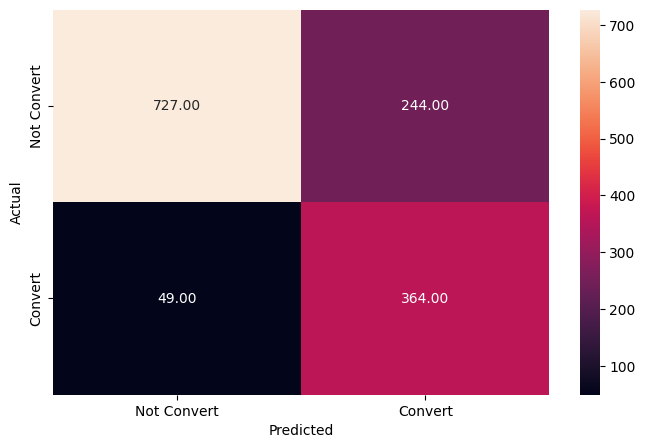

In [46]:
# Checking performance on the test data
y_test_pred_dt = dt_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [47]:
dt_tuned_test = model_performance_classification(dt_estimator, x_test, y_test)
dt_tuned_test

,Precision,Recall,Accuracy
0,0.76777,0.815034,0.788295


**Observations:**

*   **Recall**:
    *   **Class 0**: **Recall** = **75%**
    *   **Class 1**: **Recall** = **88%**
*   **Recall** for test data increased from **63%** to **88%**, while precission went down from **64%** to **60%** for **Class 1**
*   After tuning, **recall** on train data is **90%** and **88%** on test data for **Class 1**
*   This indicates that overfitting was significantly reduced and that model performs well on both, train and test data

### **Decision Tree Visualization**

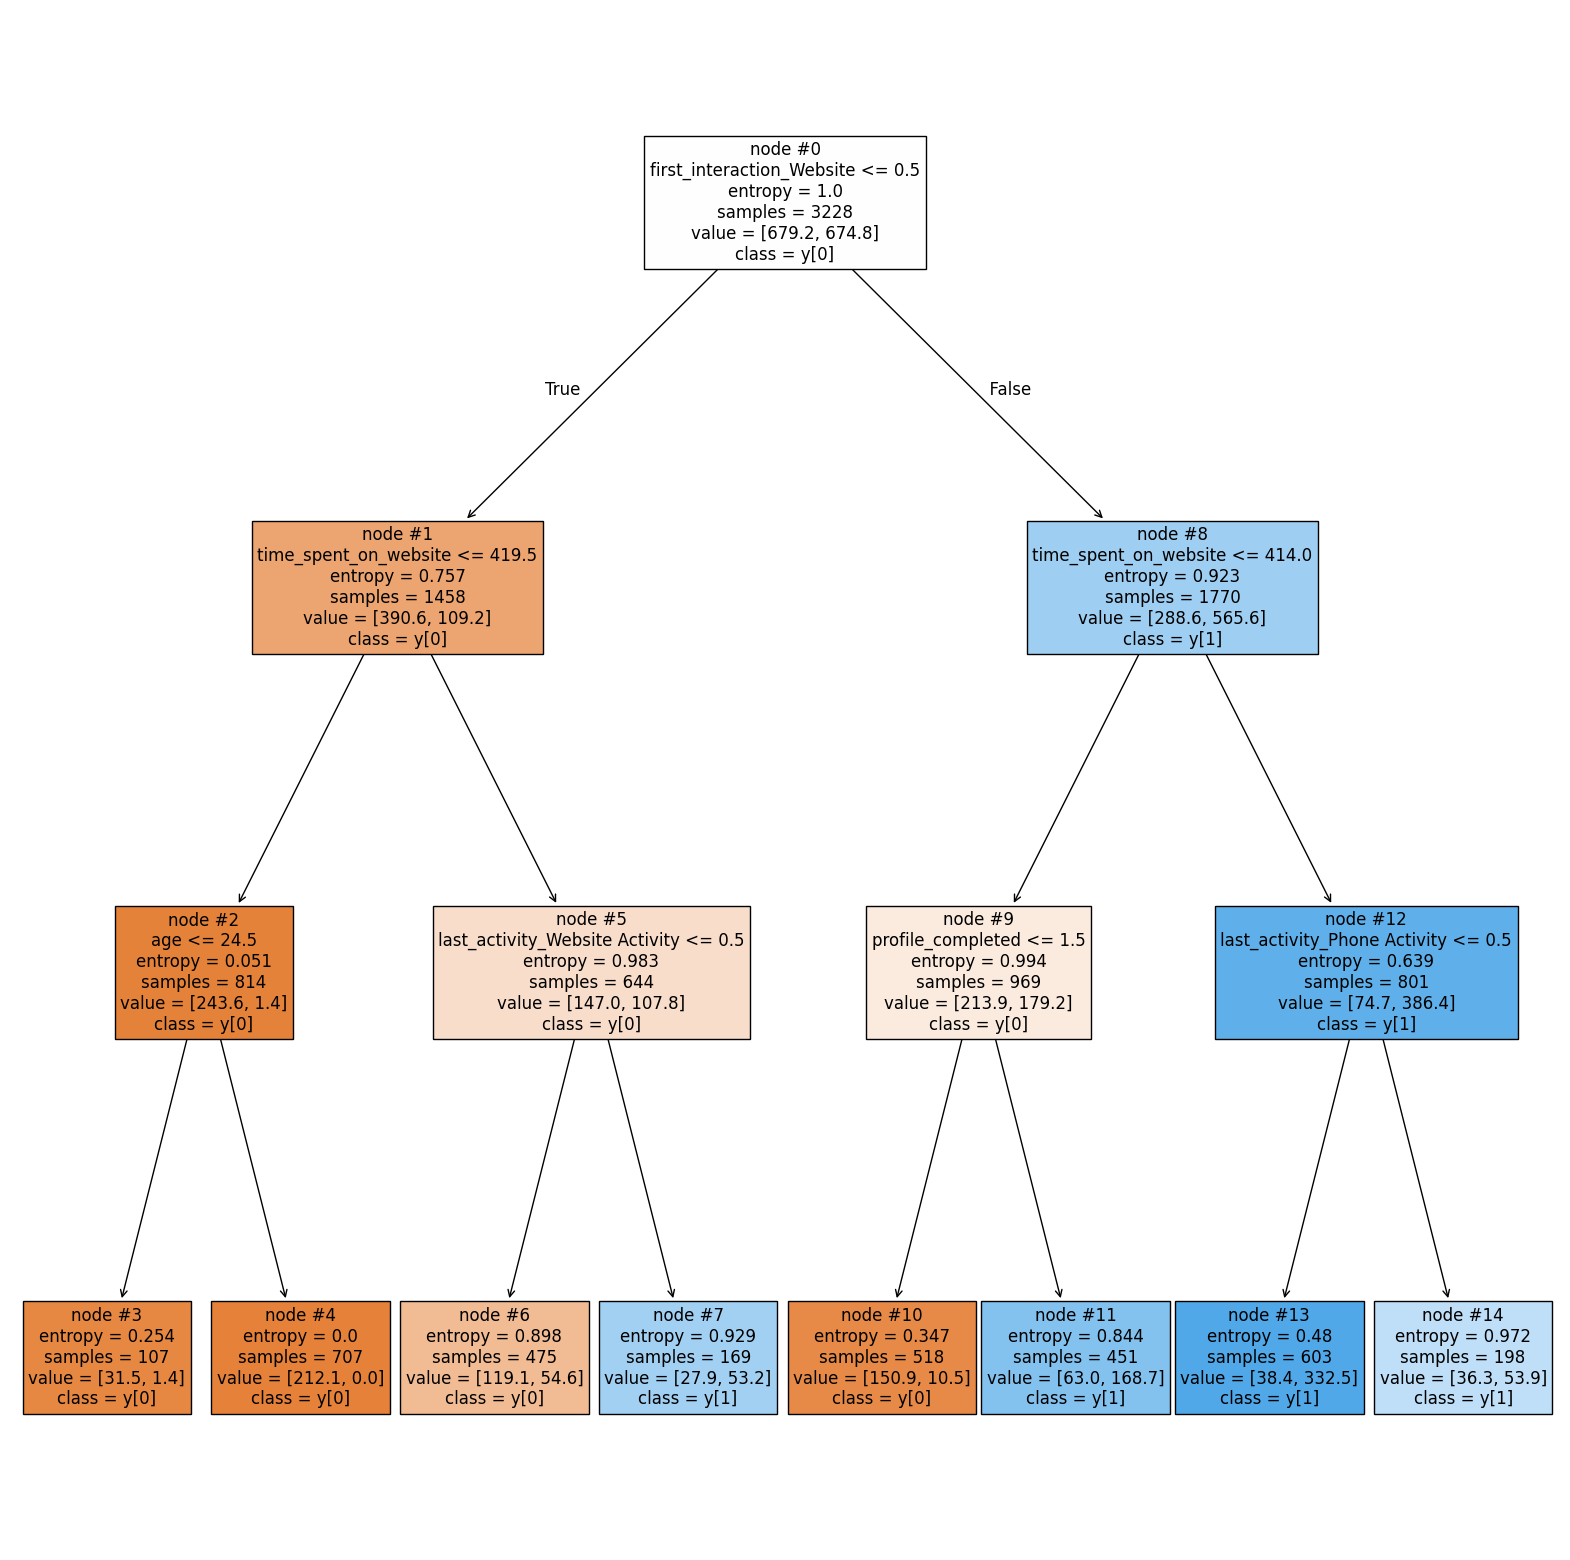

In [48]:
# Visualizing the decision tree
features = list(X.columns)

# Setting size of a plot
plt.figure(figsize = (20, 20))

# Plotting the decision tree
tree.plot_tree(dt_estimator, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

**Observations:**

*   The root node splits on **first_interaction_Website** feature, which indicates that first interaction is **primary driver of conversion**. Samples are almost equally split, which indicates that feature **first_interaction_Website** is well-balanced
*   Leads who interact with website first have higher conversion rate than those who interact with mobile App
*   Feature **time_spent_on_website** is a significant feature, since appears in both branches after the root node
*   Visitors who spend more time on the website are more likely to convert, which indicates that time spent on website is **strong conversion predictor**
*   Many leaf nodes are pure or nearly pure, which indicates that decision tree has successfully segmented the data e.g. **node #4** where **value = [212.1, 0.0]**
*   Low entropy nodes e.g. **node #4, node #2** indicate **high confidence prediction**

**Note:**

*   Blue leaves represent convertion, **class = y[1]**, while orange leaves represent non-convertion, **class = y[0]**
*   The more the number of observations in a leaf, the darker its color gets
*   Decision trees try to minimize entropy at each split, for predictions to be more precise
  *   **Entropy = 0** -> pure, perfect classification
  *   **Entropy = 1** -> impure, bad split(50/50), max uncertainty

### **Plotting Feature Importance**

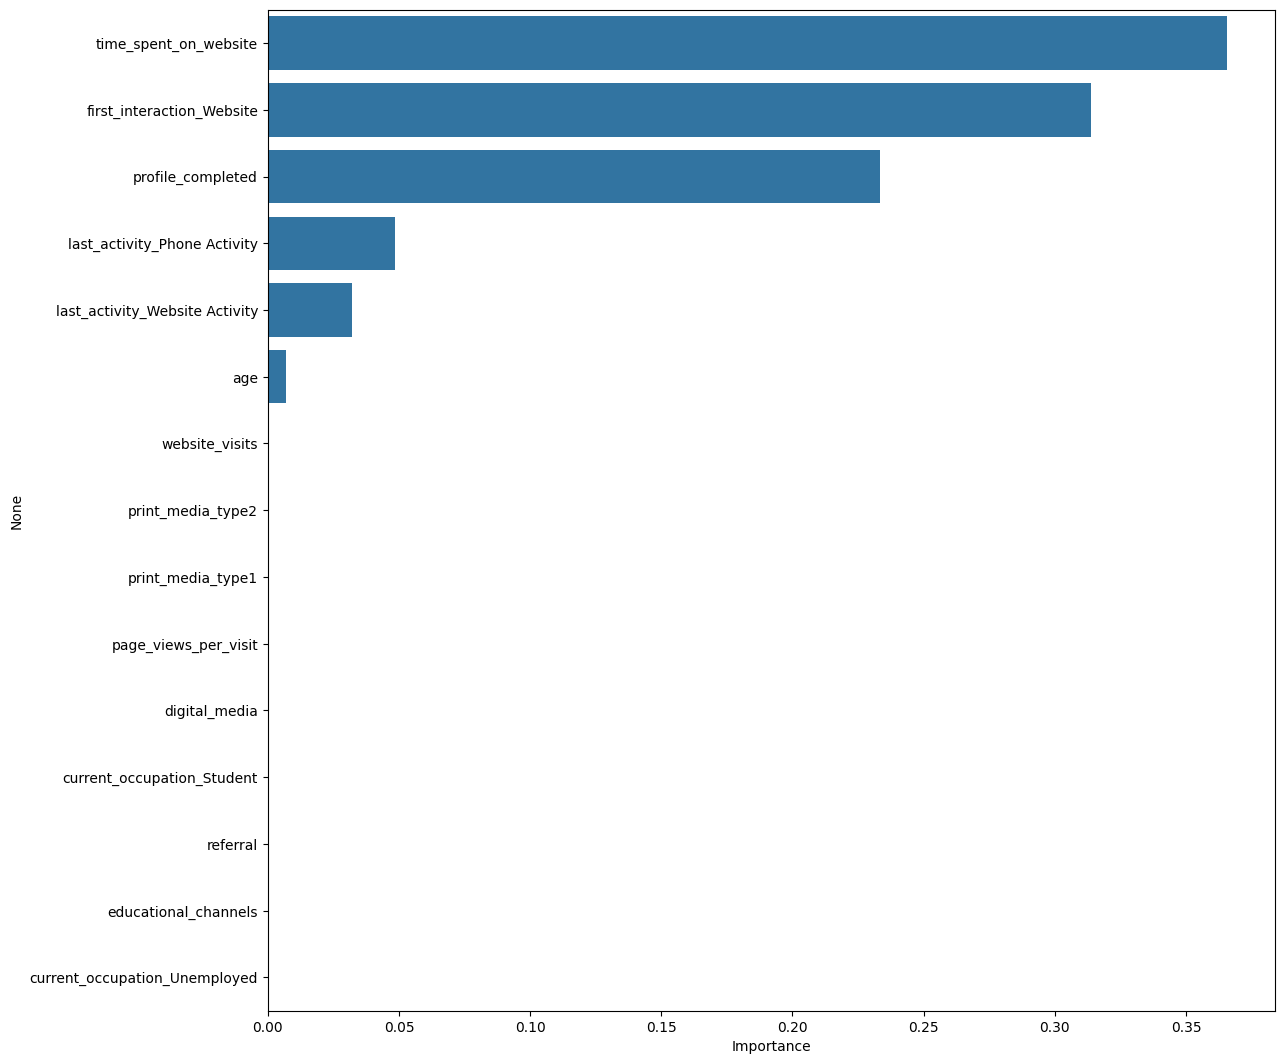

In [49]:
# Plotting the feature importance
importances = dt_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df.Importance, y = importance_df.index)

plt.show()

**Observations:**

*   According to the Decission Tree Classifier **time_spent_on_website** is the most important feature, followed by **first_interaction_website** and **profile_completed**
*   This suggests that users who spend more time on the website are more likely to convert

## **Random Forest Classifier**

### **Building the Random Forest Classifier**

*   We will build our model using the **RandomForestClassifier function**
*   **Random Forest** is a bagging algorithm where the base models are **Decision Trees.** Samples are taken from the train data and on each sample, a decision tree makes a prediction
*   The results from all the decision trees are combined and the final prediction is made using **voting** (for classification problems) or **averaging** (for regression problems)
*   **n_estimators**, **min_samples_leaf** and **max_features** are hyperparameters of the random forest classifier that will be used for tuning the model

In [50]:
# Building random forest classifier
rf = RandomForestClassifier(criterion = 'entropy', random_state = 1)

In [51]:
# Fitting random forest classifier
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

### **Checking Model Performance**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



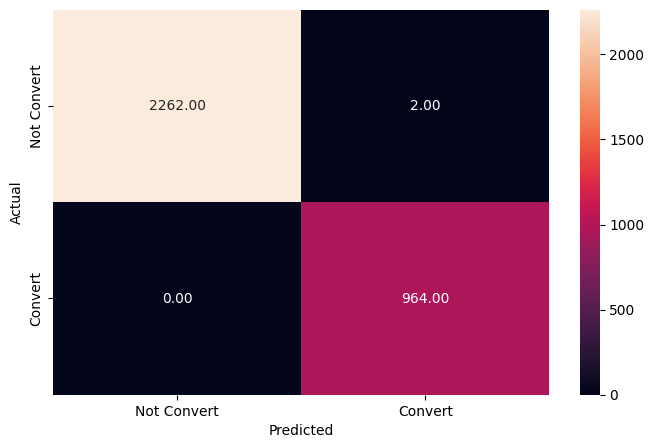

In [52]:
# Checking performance on the train data
y_train_pred_rf = rf.predict(x_train)

metrics_score(y_train, y_train_pred_rf)

**Observations:**

*   There is **100% score** for all metrics on train dataset, which indicates that model performed very good on train data
*   **100% score** for all metrics on train data may be an indicator of **overfitting** and for this reason we need to check the performance of a model on test data

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       971
           1       0.79      0.71      0.75       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



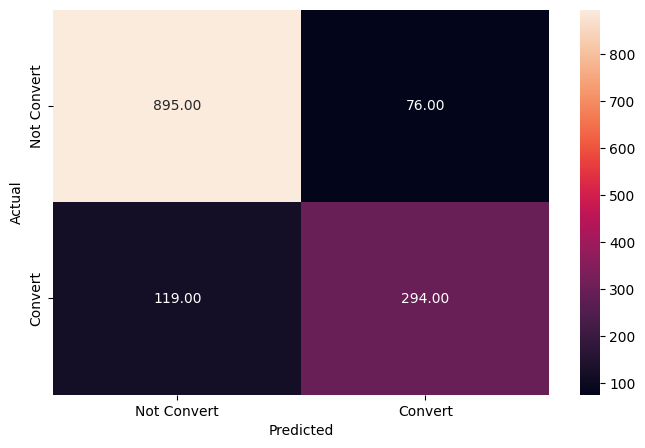

In [53]:
# Checking performance on the test data
y_test_pred_rf = rf.predict(x_test)

metrics_score(y_test, y_test_pred_rf)

In [54]:
rf_test = model_performance_classification(rf, x_test, y_test)
rf_test

,Precision,Recall,Accuracy
0,0.838619,0.816797,0.859104


**Observations:**

*   **Precision**:
    *   **Class 0**: **Precision** = **88%**
    *   **Class 1**: **Precision** = **79%**
*   **Recall**:
    *   **Class 0**: **Recall** = **92%**
    *   **Class 1**: **Recall** = **71%**
*   **F1-score**:
    *   **Class 0**: **Recall** = **90%**
    *   **Class 1**: **Recall** = **75%**
*   The Random Forest Classifier works well on train data, but not so well on test data, meaning that model is overfitting the train data
*   The **precision** of test data indicates that there is **21%** chance that model will predict that lead is going to convert into a paid customer, where in reality it won't, meaning that company would waste their recources and time on leads who are not going to convert
*   Lower **precision** of **79%** for **Class 1** indicates that model is over-predicting conversions
*   As we aim to minimize **False Negatives**, we will be focusing on maximizing **recall**
*   We can also observe that Random Forest Classifier performs better on test data, prior to hyperparameters tuning, than Decission Tree Classifier -> **Recall: RF vs DT = 71% vs 63%**

### **Model Tuning**

**Random Forest Hyperparameters:**

*   **n_estimators**: The number of trees in the forest
*   **min_samples_split**: The minimum number of samples required to split an internal node
*   **min_samples_leaf**: The minimum number of samples required to be at a leaf node
*   **max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split
  *   If “auto”, then max_features=sqrt(n_features)
  *   If “sqrt”, then max_features=sqrt(n_features) (same as “auto”)
  *   If “log2”, then max_features=log2(n_features)
  *   If None, then max_features=n_features

#### **Model Tuning with GridSearch**

*   To tell the model that **1 is an important class** we will use **class_weight** hyperparameter with values **{0: 0.3, 1: 0.7}** which is the oppposite of the imbalance in original data
*   **Note:** We will not tune hyperparameter **criterion**, since after tuning decision tree hyperparameters, we know that **entropy** was chosen as better one over **gini**

In [55]:
# Choosing the classifier type
# To tell the model that 1 is an important class, we will use class_weight hyperparameter with values {0: 0.3, 1: 0.7}, which is the oppposite of the imbalance in original data
rf_estimator = RandomForestClassifier(criterion = 'entropy', class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

# Grid of parameters to choose from
rf_parameters = {"n_estimators": [100, 120],
                 "max_depth": [6, 7],
                 "min_samples_leaf": [20, 25],
                 "max_features": [0.8, 0.9],
                 "max_samples": [0.8, 0.9]
                 }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the GridSearch
gridCV = GridSearchCV(rf_estimator, rf_parameters, scoring = scorer, cv = 5)

# Fitting the GridSearch on the train data
gridCV = gridCV.fit(x_train, y_train)

# Setting the classifier to the best combination of parameters
rf_estimator = gridCV.best_estimator_

# Fitting the best estimator to the train data
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.8,
                       min_samples_leaf=25, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2264
           1       0.68      0.88      0.77       964

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.87      0.84      0.85      3228



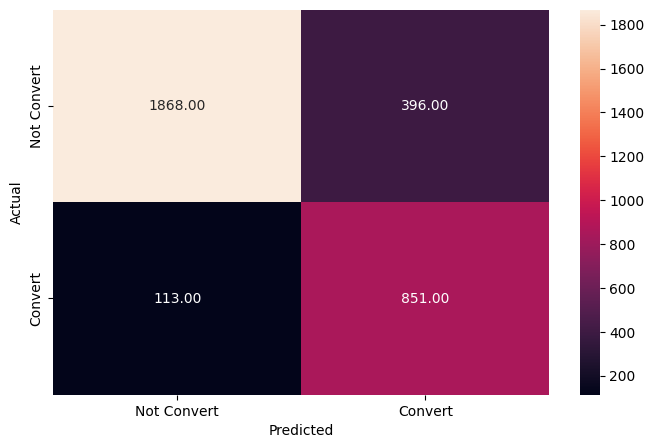

In [56]:
# Checking performance on the train data
y_train_pred_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_rf)

**Observations:**

*   **Recall**:
    *   **Class 0**: **Recall** = **83%**
    *   **Class 1**: **Recall** = **88%**
*   If we compare the performance of this model and a model with default hyperparameters values, we can see that model performance dropped
*   **Recall** dropped from **100%** to **88%** for **Class 1**
*   This makes sense since we are trying to reduce overfitting

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       971
           1       0.67      0.84      0.74       413

    accuracy                           0.83      1384
   macro avg       0.80      0.83      0.81      1384
weighted avg       0.85      0.83      0.83      1384



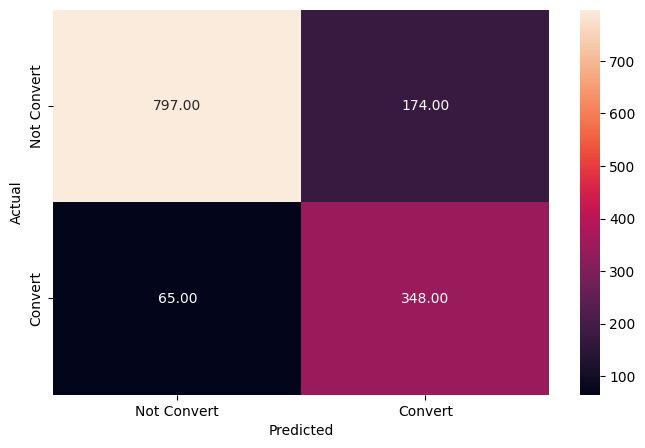

In [57]:
# Checking performance on the test data
y_test_pred_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_rf)

In [58]:
rf_tuned_test = model_performance_classification(rf_estimator, x_test, y_test)
rf_tuned_test

,Precision,Recall,Accuracy
0,0.79563,0.831709,0.827312


**Observations:**

*   **Recall**:
    *   **Class 0**: **Recall** = **82%**
    *   **Class 1**: **Recall** = **84%**
*   **Recall** for test data increased from **71%** to **84%**, while precission went down from **79%** to **67%** for **Class 1**
*   After tuning, **recall** on train data is **88%** and **84%** on test data for **Class 1**
*   This indicates that overfitting was significantly reduced and that model performs well on both, train and test data

### **Plotting Feature Importance**

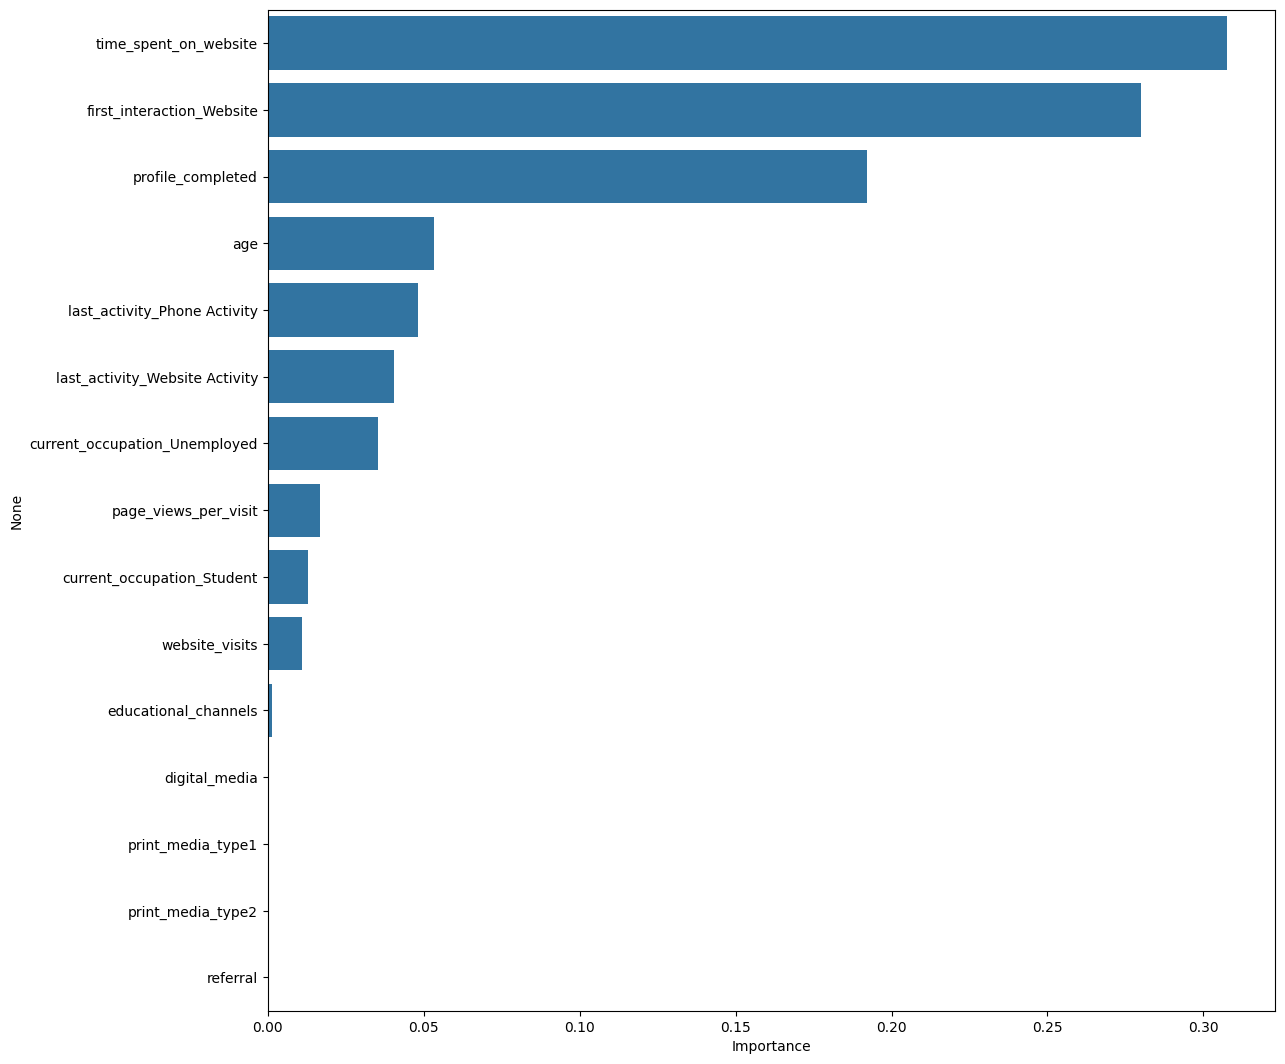

In [59]:
# Plotting the feature importance
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df1 = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df1.Importance, y = importance_df1.index)

plt.show()


**Observations:**

*   According to the Random Forest Classifier **time_spent_on_website** is the most important feature, followed by **first_interaction_website** and **profile_completed**
*   This suggests that users who spend more time on the website are more likely to convert
*   We can notice that Decision Tree Classifier identified same features as being important

## **Model Comparison**

In [61]:
# Checking performance of each model on test data
models_test_comp_df = pd.concat([dt_test.T, dt_tuned_test.T, rf_test.T, rf_tuned_test.T], axis = 1)

models_test_comp_df.columns = ['Decision Tree Classifier', 'Tuned Decision Tree Classifier', 'Random Forest Classifier', 'Tuned Random Forest Classifier']

print('Test Performance Comparison:')
print('=====' *25)

models_test_comp_df

Test Performance Comparison:


,Decision Tree Classifier,Tuned Decision Tree Classifier,Random Forest Classifier,Tuned Random Forest Classifier
Precision,0.741984,0.767770,0.838619,0.795630
Recall,0.740285,0.815034,0.816797,0.831709
Accuracy,0.783960,0.788295,0.859104,0.827312


**Observations:**

*   Model Ranking (based on **Recall**)
    1. Tuned Random Forest **83.17%**
    2. Random Forest **81.68%**
    3. Tuned Decision Tree **81.5%**
    4. Decision Tree **74.03%**
*   **Tuned Random Forest** identifies the most true converters
*   **Random Forest Classifier** has best overall performance
*   Tuning improves performance of **Decission Tree CLassifier**
*   Both **Decision Tree** models underperform in comparison to **Random Forest** models

## **Actionable Insights and Recommendations**

### **Summary**

**Exploratory Data Analysis (EDA)**

*   Carried out univarite analysis of target variable **status**, numerical variables, as well categorical variables
*   Carried out bivariate/multivariate analysis to identify correaltions between variables and assess linerity
*   Identified sifnificant features, like **time_spent_on_website**, **first_interaction_website** and **profile_completion**

**Decision Tree Classifier**

*   Built Decision Tree Classifier
*   Identified **overfitting** with **recall** of **100%** on train data and **63%** on test data for **Class 1**
*   Tuned hyperparameters and achieved **recall** of **90%** on train data and **88%** on test data for **CLass 1**
*   Visualized the Decission Tree
*   Identified important features

**Random Forest Classifier**

*   Built Random Forest Classifier
*   Identified **overfitting** with **recall** of **100%** on train data and **71%** on test data for **Class 1**
*   Tuned hyperparameters and achieved **recall** of **88%** on train data and **84%** on test data for **CLass 1**
*   Identified important features

### **Actionable Insights**

*   Leads who interact with website first have higher conversion rate than those who interact with mobile App
*   Visitors who spend more time on the website are more likely to convert, which indicates that time spent on website is **strong conversion predictor**
*   Profile completion strongly affects likelihood of conversion
*   Lead who have **Email** as their last activity show slightly better conversion rate than those who have **Website** or **Phone**
*   Refferal-based leads, even fewer, shown relatively high conversion rate, which is channel that is worth exploring more
*   Leads who have occupation **Professional** have higher coversion rate than those whose occupation is **Student** or **Unemployed**
*   Leads who interact through Mobile App have lower converiosn rate, which might indicate that mobile experience needs optimization

### **Recommendations**

*   Encourage visitors to interact through the website initially
*   Focus on increasing visitor's time spent on website
  *   Optimize UX and content
  *   Improve landing page of the website
  *   Improve internal linking between pages to encourage deeper exploration
  *   Introduce AI Chat or/and **FAQ widgets**
  *   Offer exit-intent pop-ups to keep visitors engaged
*   Explore tailored marketing strategies to more effectively convert younger leads into paid customers
*   Consider launching referral incentive programs
*   Encourage users to finalize their profile
*   Consider targeted follow-up based on last activity type
*   Focus marketing and content strategies around users who spend more time on the website, have higher profile completion, engage directly via website
*   Enhance UX and experience for Mobile App
*   Introduce A/B testing to evaluate impact on UX changes